## CAPSTONE PROJECT: AMAZON REVIEW ANALYSIS

### Datasets were downloaded from https://jmcauley.ucsd.edu/data/amazon/

### Datasets chosen: Home and Kitchen and Grocery and Gourmet Food

### Importing libraries

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS

# Machine Learning libraries
import sklearn 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
#Visualization libraries
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
#time series
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff


# arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#ACF, PACF, MSE
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries

from collections import defaultdict
from collections import Counter


### Importing Home and Kitchen data

In [3]:
df=pd.read_json("/content/drive/MyDrive/Project/Home_and_Kitchen_5.json",lines=True)

In [4]:
df.shape          #rows and columns of whole data

(551682, 9)

In [5]:
data=df.sample(70000,ignore_index=True,random_state=69)         #taking 70000 observations as sample data as the has more than 5 lakh observations

In [6]:
data.columns        #column names

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [7]:
 data.size            #total number of values

630000

In [9]:
data.shape       #rows and columns

(70000, 9)

In [8]:
data.isnull().sum()         #checking for null values

reviewerID          0
asin                0
reviewerName      582
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

### There are null values in the reviewername columns. We can ignore this column as names of customers do not affect our work

In [10]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,"05 6, 2013"
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,"07 21, 2011"
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,"07 17, 2013"
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,"12 20, 2012"
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,"06 15, 2013"
...,...,...,...,...,...,...,...,...,...
69995,A23GS4UGLQBG2V,B009REFSJI,C. Boudreau,"[1, 2]",The Bluetooth link to the Wahoo Fitness app is...,2,Cool idea but inaccurate,1391126400,"01 31, 2014"
69996,A30P3RMIH0T6XE,B002XH0KLM,lisa827,"[5, 5]",I bring this steamer when I travel to Europe. ...,5,Great for traveling,1368489600,"05 14, 2013"
69997,A3OMIAEJ629BSN,B005Q1APZS,No Bone To Pick,"[1, 2]",I sent this item back because it was just too ...,1,Too noisy for my sitting room,1389744000,"01 15, 2014"
69998,A1GS8K0TSHCX84,B001IBG6VW,A. L.,"[0, 0]",This fan moves a decent amount of air without ...,4,A quiet fan with decent air moving ability for...,1386028800,"12 3, 2013"


In [11]:
data.dtypes             #datatype of each column

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [12]:
data.reviewTime=pd.to_datetime(data['reviewTime'])           #converting the column reviewtime to datatime format

## Sentiment analysis

### Cleaning the data

In [13]:
import re

def clean_text(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()

    return text

data['reviewText_clean'] = data['reviewText'].apply(clean_text)
print(data['reviewText_clean'][:5])

0    these are classy-looking salt and pepper shake...
1    we replaced our old dgb model which failed wit...
2    this trashcan worked fine until the th month a...
3    i own a technivorm mocca master and needed a n...
4    rack will work for wooden solid shelves but no...
Name: reviewText_clean, dtype: object


### Making a new column as helpul percentage to see how helpful eahc review is 

In [14]:
b=[]
for i in data.helpful:
  if(i[1]==0):
    a=0
  else:
    a=(round(i[0]/i[1],2))
  b.append(a)

In [15]:
b=[i*100 for i in b]

In [16]:
data['Helpful_percentage']=b

In [17]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,2013-05-06,these are classy-looking salt and pepper shake...,0.0
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,2011-07-21,we replaced our old dgb model which failed wit...,50.0
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,2013-07-17,this trashcan worked fine until the th month a...,0.0
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,2012-12-20,i own a technivorm mocca master and needed a n...,0.0
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,2013-06-15,rack will work for wooden solid shelves but no...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,A23GS4UGLQBG2V,B009REFSJI,C. Boudreau,"[1, 2]",The Bluetooth link to the Wahoo Fitness app is...,2,Cool idea but inaccurate,1391126400,2014-01-31,the bluetooth link to the wahoo fitness app is...,50.0
69996,A30P3RMIH0T6XE,B002XH0KLM,lisa827,"[5, 5]",I bring this steamer when I travel to Europe. ...,5,Great for traveling,1368489600,2013-05-14,i bring this steamer when i travel to europe i...,100.0
69997,A3OMIAEJ629BSN,B005Q1APZS,No Bone To Pick,"[1, 2]",I sent this item back because it was just too ...,1,Too noisy for my sitting room,1389744000,2014-01-15,i sent this item back because it was just too ...,50.0
69998,A1GS8K0TSHCX84,B001IBG6VW,A. L.,"[0, 0]",This fan moves a decent amount of air without ...,4,A quiet fan with decent air moving ability for...,1386028800,2013-12-03,this fan moves a decent amount of air without ...,0.0


In [18]:
data.Helpful_percentage.value_counts()

0.0      41213
100.0    19018
50.0      2058
67.0      1101
75.0       823
         ...  
66.0         2
3.0          2
39.0         1
13.0         1
34.0         1
Name: Helpful_percentage, Length: 99, dtype: int64

In [19]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Stop words

In [20]:
import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
data['reviewText_clean'] = [removeStopWords(stopWords,x) for x in data['reviewText_clean']]

## Tokenization

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
tokenList=[]
for indx in range(len(data)):
       token=word_tokenize(data['reviewText_clean'][indx])
       tokenList.append(token)
data['review_tokens'] = tokenList
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,2013-05-06,classy-looking salt pepper shakers look good c...,0.0,"[classy-looking, salt, pepper, shakers, look, ..."
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,2011-07-21,replaced old dgb model failed one pleased much...,50.0,"[replaced, old, dgb, model, failed, one, pleas..."
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,2013-07-17,trashcan worked fine th month started going ha...,0.0,"[trashcan, worked, fine, th, month, started, g..."
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,2012-12-20,technivorm mocca master needed nd pot decaf pu...,0.0,"[technivorm, mocca, master, needed, nd, pot, d..."
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,2013-06-15,rack work wooden solid shelves closetmaid type...,0.0,"[rack, work, wooden, solid, shelves, closetmai..."


### Sentiment analysis

In [24]:
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in data['reviewText_clean']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.6 : 
            sentiment_score_flag.append('Excellent')

        elif ((sentimentResults['compound'] < 0.6) & (sentimentResults['compound'] >= 0.2)) : 
            sentiment_score_flag.append('Good')
  
        elif ((sentimentResults['compound'] <  0.2) & (sentimentResults['compound'] >= -0.2)): 
            sentiment_score_flag.append('Average')

        elif ((sentimentResults['compound'] < - 0.2) & (sentimentResults['compound'] >= - 0.6)) : 
            sentiment_score_flag.append('Bad')
  
        elif ((sentimentResults['compound'] <  -0.6)): 
            sentiment_score_flag.append('Worst')
            
data['scores']=sentiment_scores
data['scoreStatus'] = sentiment_score_flag

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [25]:
data.scoreStatus.value_counts()

Excellent    53502
Good          8972
Average       3934
Bad           2357
Worst         1235
Name: scoreStatus, dtype: int64

In [26]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,2013-05-06,classy-looking salt pepper shakers look good c...,0.0,"[classy-looking, salt, pepper, shakers, look, ...",0.7906,Excellent
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,2011-07-21,replaced old dgb model failed one pleased much...,50.0,"[replaced, old, dgb, model, failed, one, pleas...",0.9325,Excellent
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,2013-07-17,trashcan worked fine th month started going ha...,0.0,"[trashcan, worked, fine, th, month, started, g...",0.2023,Good
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,2012-12-20,technivorm mocca master needed nd pot decaf pu...,0.0,"[technivorm, mocca, master, needed, nd, pot, d...",0.5034,Good
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,2013-06-15,rack work wooden solid shelves closetmaid type...,0.0,"[rack, work, wooden, solid, shelves, closetmai...",0.1531,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,A23GS4UGLQBG2V,B009REFSJI,C. Boudreau,"[1, 2]",The Bluetooth link to the Wahoo Fitness app is...,2,Cool idea but inaccurate,1391126400,2014-01-31,bluetooth link wahoo fitness app cool worked f...,50.0,"[bluetooth, link, wahoo, fitness, app, cool, w...",0.9531,Excellent
69996,A30P3RMIH0T6XE,B002XH0KLM,lisa827,"[5, 5]",I bring this steamer when I travel to Europe. ...,5,Great for traveling,1368489600,2013-05-14,bring steamer travel europe burn great able st...,100.0,"[bring, steamer, travel, europe, burn, great, ...",0.7351,Excellent
69997,A3OMIAEJ629BSN,B005Q1APZS,No Bone To Pick,"[1, 2]",I sent this item back because it was just too ...,1,Too noisy for my sitting room,1389744000,2014-01-15,sent item back loud review said quiet well qui...,50.0,"[sent, item, back, loud, review, said, quiet, ...",0.2732,Good
69998,A1GS8K0TSHCX84,B001IBG6VW,A. L.,"[0, 0]",This fan moves a decent amount of air without ...,4,A quiet fan with decent air moving ability for...,1386028800,2013-12-03,fan moves decent amount air without loud ideal...,0.0,"[fan, moves, decent, amount, air, without, lou...",0.7762,Excellent


In [27]:
def wordcloud(df,name):
    words = " ".join(sent for sent in df['reviewText_clean'])
    #print(words)
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name,fontsize=25)
    plt.show()

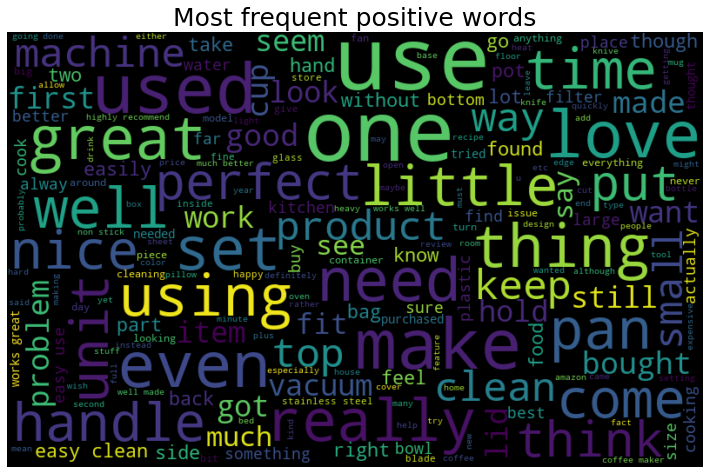

In [28]:
wordcloud(data[data['scoreStatus']=='Excellent'],'Most frequent positive words')

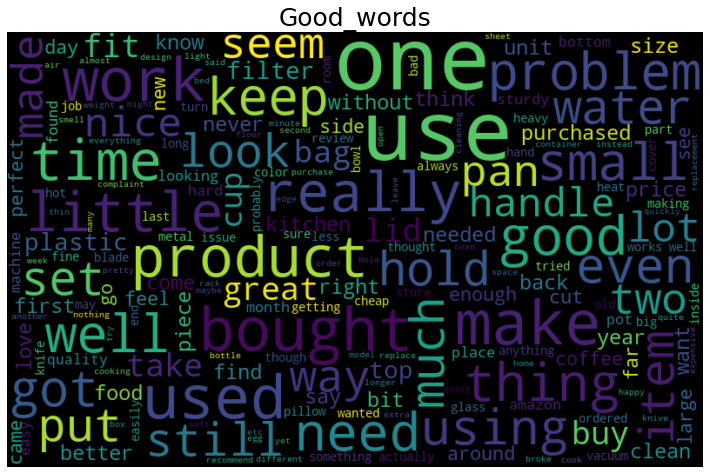

In [29]:
wordcloud(data[data['scoreStatus']=='Good'],'Good_words')

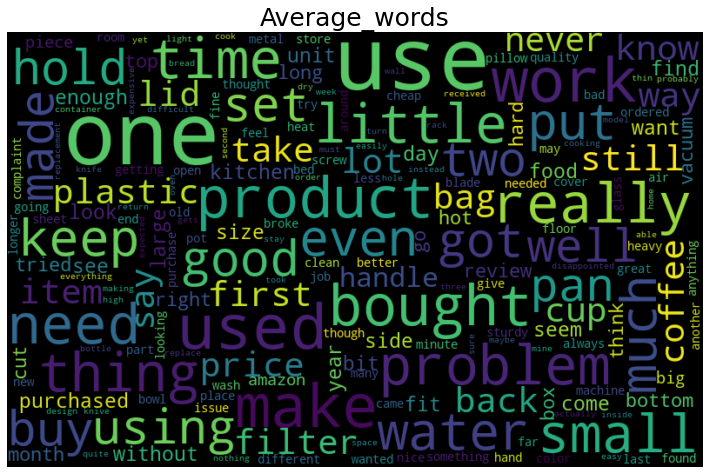

In [30]:
wordcloud(data[data['scoreStatus']=='Average'],'Average_words')

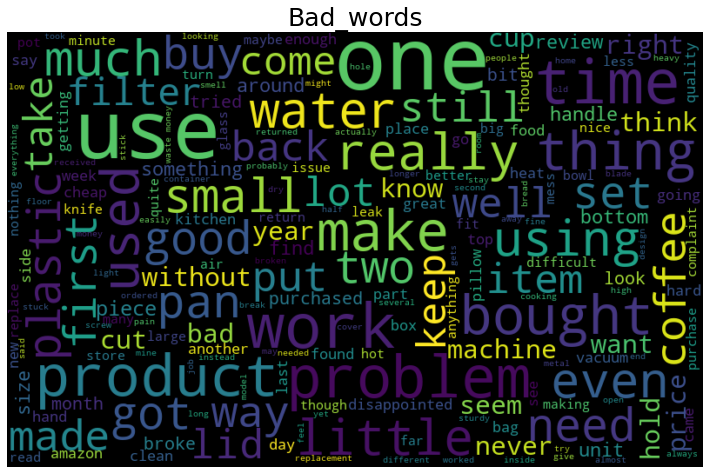

In [31]:
wordcloud(data[data['scoreStatus']=='Bad'],'Bad_words')

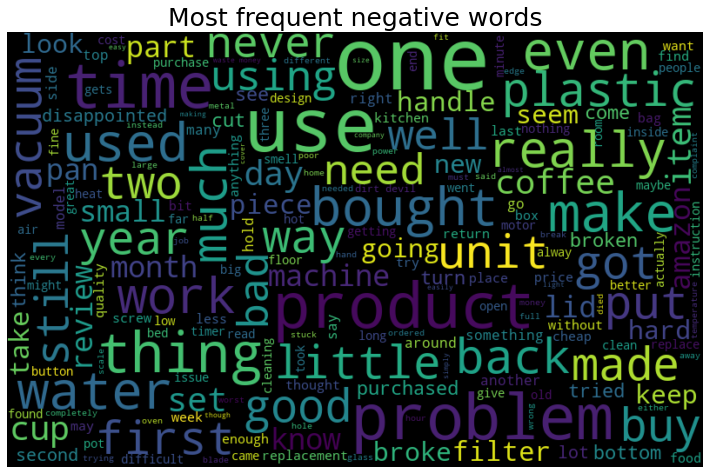

In [32]:
wordcloud(data[data['scoreStatus']=='Worst'],'Most frequent negative words')

In [33]:
df_model = data[data['scoreStatus'] != 'Average']

### Classification model building

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:

x = df_model['reviewText_clean']
y = df_model['scoreStatus']

In [36]:
trainx,testx,trainy,testy= train_test_split(x,y,test_size=0.2,random_state=20)
print("train_x={}, train_y={},test_x={}, test_y={}".format(len(trainx),len(trainy),len(testx),len(testy)))



train_x=52852, train_y=52852,test_x=13214, test_y=13214


In [37]:
vectorizer = TfidfVectorizer(sublinear_tf=True,
                             max_df=0.5,
                             min_df=1,
                             use_idf=True,
                             smooth_idf=True,lowercase=True, max_features=5000)

In [38]:
trainx_v=vectorizer.fit_transform(trainx)
testx_v=vectorizer.transform(testx)
print(trainx_v.shape)
print(testx_v.shape)

(52852, 5000)
(13214, 5000)


### Logistic Regression

In [39]:
m1=LogisticRegression(max_iter=100)
m1_ova=OneVsRestClassifier(m1).fit(trainx_v,trainy)

In [40]:
p1=m1_ova.predict(testx_v)
pd.DataFrame({'Actual':testy,"predicted":p1})[:10]

,Actual,predicted
55130,Excellent,Excellent
19943,Excellent,Excellent
45625,Excellent,Excellent
65268,Bad,Good
28160,Excellent,Excellent
4457,Worst,Excellent
36310,Excellent,Excellent
25270,Bad,Good
7016,Excellent,Excellent
61209,Excellent,Excellent


In [41]:
def evaluate(actual,predicted):
    print('Accuracy:',accuracy_score(actual,predicted))
    print('------------------------------------------------------------')
    print("\nclassification report: \n",classification_report(testy, predicted))

In [42]:
evaluate(testy,p1)

Accuracy: 0.839412744059331
------------------------------------------------------------

classification report: 
               precision    recall  f1-score   support

         Bad       0.36      0.04      0.06       482
   Excellent       0.87      0.99      0.93     10705
        Good       0.46      0.25      0.32      1766
       Worst       0.53      0.03      0.06       261

    accuracy                           0.84     13214
   macro avg       0.56      0.33      0.34     13214
weighted avg       0.79      0.84      0.80     13214



In [43]:
a=[]

In [44]:
a.append(round(accuracy_score(testy,p1),2))


### Naive Bayes

In [45]:
m2 = MultinomialNB()
ovr2=OneVsRestClassifier(m2).fit(trainx_v,trainy)

In [46]:
p2=ovr2.predict(testx_v)
pd.DataFrame({'Actual':testy,"predicted":p2})[:10]

,Actual,predicted
55130,Excellent,Excellent
19943,Excellent,Excellent
45625,Excellent,Excellent
65268,Bad,Excellent
28160,Excellent,Excellent
4457,Worst,Excellent
36310,Excellent,Excellent
25270,Bad,Excellent
7016,Excellent,Excellent
61209,Excellent,Excellent


In [47]:
evaluate(testy,p2)

Accuracy: 0.8102013016497654
------------------------------------------------------------

classification report: 
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       482
   Excellent       0.81      1.00      0.90     10705
        Good       0.00      0.00      0.00      1766
       Worst       1.00      0.00      0.01       261

    accuracy                           0.81     13214
   macro avg       0.45      0.25      0.23     13214
weighted avg       0.68      0.81      0.73     13214



In [48]:

a.append(round(accuracy_score(testy,p2),2))


### Decision Tree

In [49]:
m3 = DecisionTreeClassifier()
ovr3=OneVsRestClassifier(m3).fit(trainx_v,trainy)

In [50]:
p3=ovr3.predict(testx_v)
pd.DataFrame({'Actual':testy,"predicted":p3})[:10]

,Actual,predicted
55130,Excellent,Excellent
19943,Excellent,Excellent
45625,Excellent,Worst
65268,Bad,Good
28160,Excellent,Excellent
4457,Worst,Excellent
36310,Excellent,Excellent
25270,Bad,Good
7016,Excellent,Excellent
61209,Excellent,Excellent


In [51]:
evaluate(testy,p3)

Accuracy: 0.7220372332374754
------------------------------------------------------------

classification report: 
               precision    recall  f1-score   support

         Bad       0.28      0.07      0.12       482
   Excellent       0.91      0.83      0.86     10705
        Good       0.32      0.30      0.31      1766
       Worst       0.07      0.46      0.13       261

    accuracy                           0.72     13214
   macro avg       0.39      0.42      0.35     13214
weighted avg       0.79      0.72      0.75     13214



In [52]:
a.append(round(accuracy_score(testy,p3),2))

### Random Forest

In [53]:
m4 = RandomForestClassifier()
ovr4=OneVsRestClassifier(m4).fit(trainx_v,trainy)

In [54]:
p4=ovr4.predict(testx_v)
pd.DataFrame({'Actual':testy,"predicted":p4})[:10]

,Actual,predicted
55130,Excellent,Excellent
19943,Excellent,Excellent
45625,Excellent,Excellent
65268,Bad,Good
28160,Excellent,Excellent
4457,Worst,Excellent
36310,Excellent,Excellent
25270,Bad,Good
7016,Excellent,Excellent
61209,Excellent,Excellent


In [55]:
evaluate(testy,p4)

Accuracy: 0.8193582563947328
------------------------------------------------------------

classification report: 
               precision    recall  f1-score   support

         Bad       0.69      0.05      0.09       482
   Excellent       0.83      1.00      0.90     10705
        Good       0.47      0.07      0.12      1766
       Worst       0.60      0.01      0.02       261

    accuracy                           0.82     13214
   macro avg       0.65      0.28      0.28     13214
weighted avg       0.77      0.82      0.75     13214



In [56]:
a.append(round(accuracy_score(testy,p4),2))

### AdaBoosting

In [57]:
m5 = AdaBoostClassifier()
ovr5=OneVsRestClassifier(m5).fit(trainx_v,trainy)

In [58]:
p5=ovr5.predict(testx_v)
pd.DataFrame({'Actual':testy,"predicted":p5})[:10]

,Actual,predicted
55130,Excellent,Excellent
19943,Excellent,Excellent
45625,Excellent,Good
65268,Bad,Good
28160,Excellent,Good
4457,Worst,Excellent
36310,Excellent,Excellent
25270,Bad,Good
7016,Excellent,Excellent
61209,Excellent,Excellent


In [59]:
evaluate(testy,p5)

Accuracy: 0.8262448917814439
------------------------------------------------------------

classification report: 
               precision    recall  f1-score   support

         Bad       0.26      0.05      0.09       482
   Excellent       0.86      0.98      0.92     10705
        Good       0.41      0.20      0.27      1766
       Worst       0.54      0.13      0.20       261

    accuracy                           0.83     13214
   macro avg       0.52      0.34      0.37     13214
weighted avg       0.77      0.83      0.79     13214



In [60]:
a.append(round(accuracy_score(testy,p5),2))

In [61]:
a

[0.84, 0.81, 0.72, 0.82, 0.83]

In [62]:
names=['Logistic Regression','Navie Bayes','Decision Tree','Random Forest','AdaBoosting']

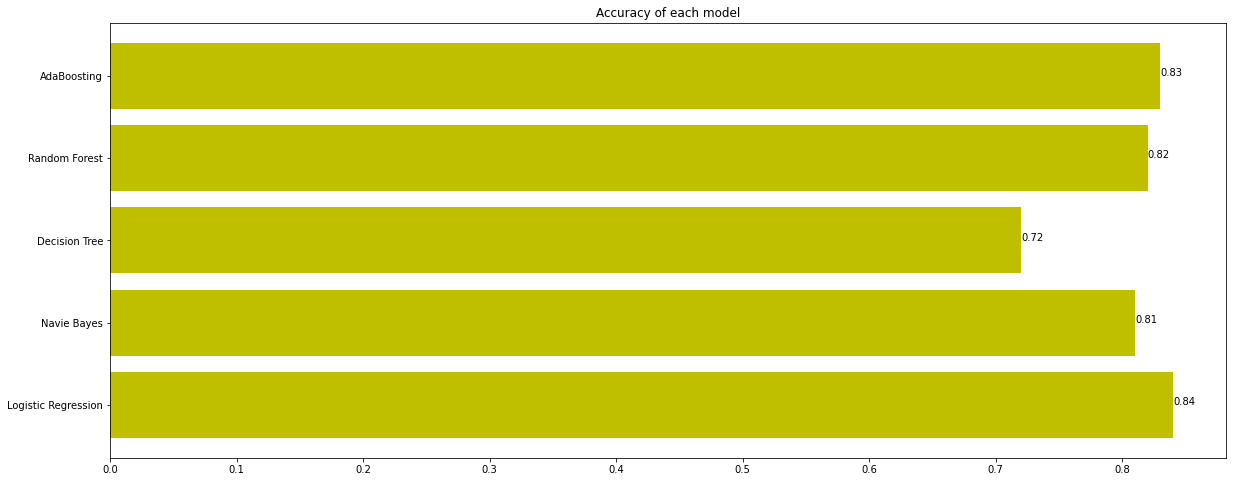

In [63]:
plt.figure(figsize=(20,8))
plt.barh(names,a,color='y')
for i,v in enumerate(a):
  plt.text(v,i,str(v))
plt.title("Accuracy of each model")
plt.show()

## Product names

In [64]:
negative=data[(data['scoreStatus']=='Worst')|(data['scoreStatus']=='Bad')]

In [65]:
positive=data[(data['scoreStatus']=='Excellent')|(data['scoreStatus']=='Good')]

In [66]:
negative[negative['asin']=='B000QFDNP8'].iloc[5,4]

"I've had my Contigo coffee tumbler for less than a week, but this is a winner. In fact, I immediately ordered more for Christmas gifts. My coffee stays hot until I'm done drinking it, and I don't have spots on my clothes when I walk into the office anymore!UPDATE 2/10/13: Don't you just hate finding an exciting product that turns out to be a monumental disappointment? For some reason, after using this Contigo tumbler for less than 2 months, it suddenly became a dribble glass. I'm talking full dribble from both the drink hole AND the seal when I tilt it for drinking. I used and cleaned my Contigo tumbler carefully since I paid a premium for it. I contacted Contigo, and the silence is deafening -- well, certainly disheartening -- since they haven't replied to my email sent a few weeks ago. I haven't heard Word One from them, so can only assume their customer service fails the customer, and they aren't going to stand behind their product. Naturally I can't recommend this expensive produc

In [67]:
positive[positive['asin']=='B00004SPEU'].reviewText

127      I really needed a new grinder.  Didn't realize...
438      This was a gift to my daughter for grinding sp...
596      Perfect for grinding your own beans in the mor...
1867     It grinds the coffee very quickly and evenly. ...
2099     Krups had good reviews when I bought my first ...
                               ...                        
61851    It works, but there's no place to wrap the cor...
62418    I ground my coffee in this - and its amazing. ...
68924    This grinder does a fine job. I bought it to g...
69144    I like this grinder so much that I have purcha...
69708    At last! A grinder that can grind flax seeds. ...
Name: reviewText, Length: 75, dtype: object

In [68]:

positive[positive['asin']=='B00005B8K5'].iloc[13,4]

"So these are glass bowls - great for not ingesting any more chemicals than necessary.  Plastic lids - great for not exploding contents of glass bowl into the microwave.  The lids go on pretty easily - I'd say half the time I actually have to look at the bowl and consider what I'm doing.  So that's why I give it 4 stars - if you make me think about what my hands are doing you are asking me to work hard.Great value for this size set! I feel like 2 sets would be ideal for a small family; and a round and square set of equal size would be the best solution to trashing all those plastic containers. The bowls are straight sided - something to consider for storage space. Oh and these are packed really well in the box - nothing arrived broken."

In [69]:
positive.asin.value_counts()

B00006JSUA    108
B001N07KUE     91
B00009R66F     81
B00004SPEU     75
B00005B8K5     74
             ... 
B007ACTNFY      1
B005H86KLI      1
B003XPI1QY      1
B002BSGY5E      1
B002XH0KLM      1
Name: asin, Length: 20045, dtype: int64

In [70]:
negative.asin.value_counts()

B00005IBX9    6
B003A2IDMC    6
B00018RRRK    6
B000QFDNP8    6
B001T4ZAX8    6
             ..
B000ME3DP8    1
B000063SLI    1
B003R50PL4    1
B003WJQ2KI    1
B00CBKW6BI    1
Name: asin, Length: 2912, dtype: int64

In [71]:
n1=negative[negative['asin']=='B000QFDNP8'].index
n2=negative[negative['asin']=='B00AETU4WQ'].index
n3=negative[negative['asin']=='B000I1ZXIK'].index

In [72]:
p1=positive[positive['asin']=='B00006JSUA'].index
p2=positive[positive['asin']=='B001N07KUE'].index
p3=positive[positive['asin']=='B00004SPEU'].index
p4=positive[positive['asin']=='B00009R66F'].index
p5=positive[positive['asin']=='B00005B8K5'].index

In [73]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nouns = []
def productnames(doc1):
    noun=[]
    d=nlp(str(doc1))
    for token in d:
        if token.pos_ == 'NOUN':
            noun.append(token)
    print(noun)

In [74]:
for i in p5:
  doc1=positive.reviewText_clean[i]
  productnames(doc1)

[wife, sets, time, store, leftovers, lunches, work, day, time, quality, plastic, containers, containers, wash, dishwasher, lids, freezer, thing, stack, lot, cabinet, space, kitchen, storage, love, product, bowls, ones, ones, trade, ones, heartbeat]
[freeze, soups, chili, lids, glass, plastic, breeze, food, storage]
[glass, rocks, plastic, counterparts, color, smell]
[glass, storage, containers, space, work, storage, quality, product]
[glass, rubber, tops, deform, time, well]
[reports, plastics, food, microwave, plastic, containers, purchase, variety, sizes, lids, soup, winter]
[number, lids, bowls, mind, pieces, bowls, lids, seals, method, end, bowl, lids, people, lids, problems, months, household, guys, wash, dishwasher]
[size, dishes, microwave, sizes, containers, size, pyrex, company, years, order, lids, use, cover, microwave]
[love, person, things, advantage, baking, pans]
[use, batch, food, need, freeze, portion, size, containers, glass, b, c, glass, microwave, plastic]
[container

In [75]:
for i in n2:
  doc1=negative.reviewText_clean[i]
  productnames(doc1)

In [76]:
for i in n1:
  doc1=negative.reviewText_clean[i]
  productnames(doc1)

[travel, mug, bunch, leak]
[husband, drinks, hours, leak, cupholders, cars, coffee, holder, fact, hits, quits, dripless, mess, week, end, school, cream, heat, mess, cover, pop, rinse, cover, smell, milk]
[travel, mugs, spill, leak, bag, drop, liquids, hours, hr, work, day, gifts, product, travel, mug]
[husband, taste, drink, taste, works]
[mugs, year, mug, drip, drinks, cold]
[tumbler, week, winner, fact, gifts, coffee, drinking, spots, clothes, office, hate, product, disappointment, reason, months, glass, drink, hole, seal, tilt, drinking, silence, email, weeks, word, customer, service, customer, product, product, plus, kid, family]


In [77]:
for i in p4:
  doc1=positive.reviewText_clean[i]
  productnames(doc1)

[job, cleaning, hoover, steamvac, problem, roomi, replasemend]
[steamvac, replacement, hoover, water, pump, version, improvements, one, job, solution, air, carpet, job, things, upholstery, tool, steps, version, problem, vacuum, hoses, unit, tilt, design, eliminates, problem, work, trade, opinon, solution, tank, holes, tilt, handle, recovery, tank, leak, solution, machine, floor, manual, solution, tank, recovery, tank, uses, center, brush, shaft, front, machine, know, hoover, support, problem, things, machine, job, issues, product, update, review, hoover, brush, issue]
[u, dgshopper, time, yesterday, job, carpet, problems, years, model, job, cleaning]
[time, thanks, dogs, soil, door, accidents, seattle, deal, dogs, solutions, ship, heat, water, solution, takn, baby, lifesaver, pups]
[leave, review, year, week, wish, year, carpet, year, carpet, stains, carpet, water, tank, crap, floors, rest, rooms, resolve, liquid, gallon, hoover, stuff, gallon, amazon, course, tips, vacuum, cleaning, h

In [78]:
n1

Int64Index([8305, 15723, 26612, 36947, 38453, 62637], dtype='int64')

In [79]:
# Import the necessary libraries
import spacy
from spacy import displacy

# Load the pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Define some input text
input_text = data['reviewText_clean'][33862]

# Parse the text with the NER model
doc = nlp(input_text)

# Iterate over the named entities in the document

    # Print the entity text and its label
person_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
print(person_names)

# Visualize the named entities in the document
displacy.render(doc, style="ent")

['bin']


'<div class="entities" style="line-height: 2.5; direction: ltr">waste money basically bottom tray seal well water bottom vegetable \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    bin\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n yes collapses beautifully foresee time near future breaks sturdy difficult get collapse return full size favor buy something else</div>'

In [80]:
for i in p5:
  input_text = positive.reviewText_clean[i]
  doc = nlp(input_text)

  person_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
  print(person_names) 
# Visualize the named entities in the document
  displacy.render(doc,style="ent")

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['glass bowls great']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['indestructible2', 'them3', 'kitchens7']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [81]:
for i in p4:
  input_text = positive.reviewText_clean[i]
  doc = nlp(input_text)

  person_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
  print(person_names) 
# Visualize the named entities in the document
  displacy.render(doc,style="ent")

[]
[]
[]
[]
[]
[]
['b00450u6cs ref cm']
['hose', 'hose', 'hose', 'hose', 'hose', 'hose']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['hose']
['kirby shampooer']
[]
[]
[]
[]
[]
[]
[]
[]
['hose']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['hose']
[]
[]
['hose']
[]
[]
[]
[]
[]
[]
[]
['hose hose']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['hose']
[]
[]
[]
[]
[]
[]


In [82]:
for i in p3:
  input_text = positive.reviewText_clean[i]
  doc = nlp(input_text)

  person_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
  print(person_names) 
# Visualize the named entities in the document
  displacy.render(doc,style="ent")

[]
[]
[]
[]
[]
[]
[]
[]
['mason jar coffee']
[]
[]
[]
['krups grinder']
[]
[]
['hate admit krups']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['krups grinder']
[]
[]
[]
[]
['joe easy']
[]
[]
[]
[]
[]
[]
[]
['recirculating grinder', 'lynn hoffman']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['krups grinder']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['krups grinder']


In [83]:
for i in n1:
  input_text = negative.reviewText_clean[i]
  doc = nlp(input_text)

  person_names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
  print(person_names) 
# Visualize the named entities in the document
  displacy.render(doc,style="ent")

['mug']
[]
[]
[]
[]
['contigo coffee tumbler']


## Time series

## Product

In [85]:
n1=negative[negative['asin']=='B000QFDNP8'].index
p3=positive[positive['asin']=='B00004SPEU'].index

In [86]:
p1=data[data['asin']=='B00004SPEU']

In [87]:
p1.set_index(p1.reviewTime,inplace=True)


In [88]:
pp1=p1[['scores']].resample('M').mean()

In [89]:
pp1.fillna(pp1.scores.mean(),inplace=True)

In [90]:
pp1

,scores
reviewTime,
2002-12-31,0.964800
2003-01-31,0.685040
2003-02-28,0.685040
2003-03-31,0.685040
2003-04-30,0.685040
...,...
2014-03-31,0.904500
2014-04-30,0.559300
2014-05-31,0.593417


In [93]:
checkStationarity(pp1.scores)

1.3061131529255468e-07


'pvalue=1.3061131529255468e-07. Data is Stationary. Proceed to model building'

In [94]:
model_sarima = sm.tsa.statespace.SARIMAX(pp1,order=(1,0,1),seasonal_order=(1,1,0,12)).fit()

In [95]:
predictions_sarima = model_sarima.predict()
print(predictions_sarima)

reviewTime
2002-12-31    0.000000e+00
2003-01-31    1.119670e-08
2003-02-28    1.712375e-08
2003-03-31    2.173580e-08
2003-04-30    2.509388e-08
                  ...     
2014-03-31    7.188907e-01
2014-04-30    8.135848e-01
2014-05-31    8.582166e-01
2014-06-30    6.856774e-01
2014-07-31    3.814697e-01
Freq: M, Name: predicted_mean, Length: 140, dtype: float64


In [96]:
forecast=model_sarima.forecast(10)

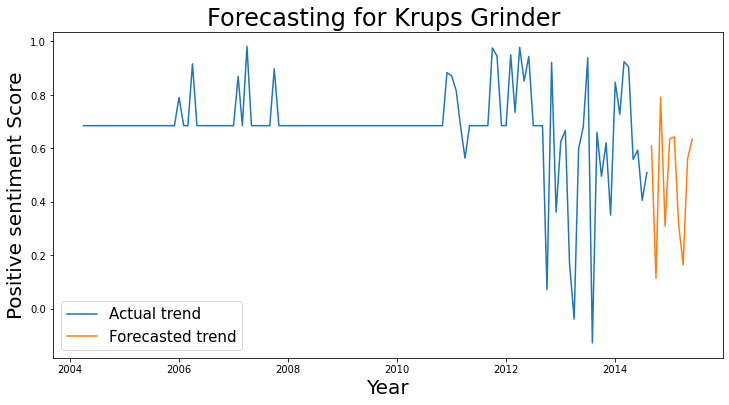

In [97]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(pp1.scores[15:], label='Actual trend')
ax.plot(forecast, label='Forecasted trend')
plt.ylabel('Positive sentiment Score',fontsize=20)
plt.xlabel('Year',fontsize=20)
leg = ax.legend(fontsize=15)
plt.title('Forecasting for Krups Grinder ',fontsize=24)
plt.show()

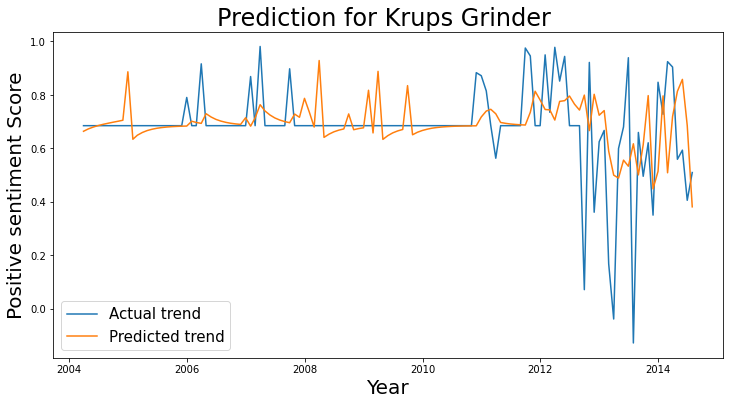

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(pp1.scores[15:], label='Actual trend')
ax.plot(predictions_sarima[15:], label='Predicted trend')
plt.ylabel('Positive sentiment Score',fontsize=20)
plt.xlabel('Year',fontsize=20)
leg = ax.legend(fontsize=15)
plt.title('Prediction for Krups Grinder ',fontsize=24)
plt.show()

### Coffee mug

In [99]:
n1=data[data['asin']=='B000QFDNP8']

In [100]:
n1.set_index(n1.reviewTime,inplace=True)


In [101]:
nn1=n1[['scores']].resample('M').mean()

In [102]:
nn1.fillna(nn1.scores.mean(),inplace=True)

In [103]:
nn1

,scores
reviewTime,
2009-06-30,0.243650
2009-07-31,0.784500
2009-08-31,0.871300
2009-09-30,0.689100
2009-10-31,0.718210
...,...
2014-03-31,0.555583
2014-04-30,0.939850
2014-05-31,0.963800


In [104]:
checkStationarity(nn1.scores)

7.528742484095874e-14


'pvalue=7.528742484095874e-14. Data is Stationary. Proceed to model building'

In [105]:
model_sarima = sm.tsa.statespace.SARIMAX(nn1,order=(1,0,1),seasonal_order=(1,1,0,12)).fit()

In [106]:
predictions_sarima = model_sarima.predict()
print(predictions_sarima)

reviewTime
2009-06-30    0.000000e+00
2009-07-31   -1.835488e-09
2009-08-31   -7.399052e-09
2009-09-30   -1.253672e-08
2009-10-31   -1.520481e-08
                  ...     
2014-03-31    1.612899e-01
2014-04-30    7.752099e-01
2014-05-31    8.523105e-01
2014-06-30    8.856096e-01
2014-07-31    8.145679e-01
Freq: M, Name: predicted_mean, Length: 62, dtype: float64


In [107]:
forecast=model_sarima.forecast(10)

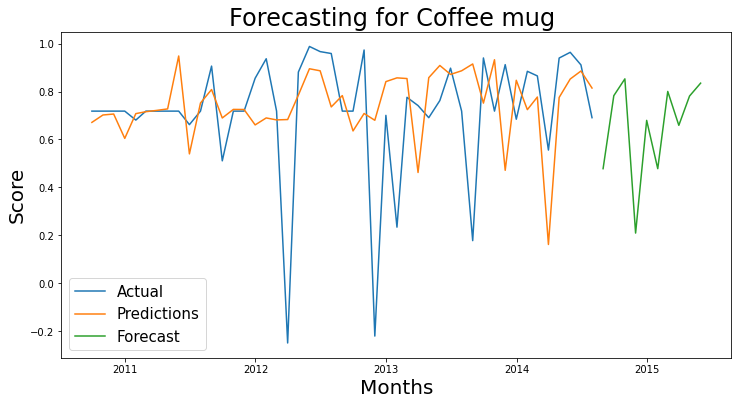

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(nn1.scores[15:], label='Actual')
ax.plot(predictions_sarima[15:], label='Predictions')
ax.plot(forecast, label='Forecast')
plt.ylabel('Score',fontsize=20)
plt.xlabel('Months',fontsize=20)
leg = ax.legend(fontsize=15)
plt.title('Forecasting for Coffee mug ',fontsize=24)
plt.show()

In [109]:
df6 = data[["scores", "reviewTime", 'scoreStatus']]

In [110]:
df6_pos = df6[(df6["scoreStatus"]=="Excellent") | (df6["scoreStatus"]=="Good")]
df6_neg = df6[(df6["scoreStatus"]=="Bad") | (df6["scoreStatus"]=="Worst")]

In [111]:
df6_pos.index = df6_pos["reviewTime"]
df6_pos = df6_pos.drop(["reviewTime", "scoreStatus"], axis = 1)


df6_neg.index = df6_neg["reviewTime"]
df6_neg = df6_neg.drop(["reviewTime", "scoreStatus"], axis = 1)

In [112]:
pos_df = df6_pos.resample('m').mean()
neg_df = df6_neg.resample('m').mean()

In [113]:
mean1 = pos_df["scores"].mean()
mean2 = neg_df["scores"].mean()

In [114]:
pos_df["scores"] = pos_df["scores"].fillna(mean1)
neg_df["scores"] = neg_df["scores"].fillna(mean2)

In [115]:
neg_df.isnull().sum()

scores    0
dtype: int64

In [116]:
pos_df

,scores
reviewTime,
2000-05-31,0.831886
2000-06-30,0.864633
2000-07-31,0.874500
2000-08-31,0.954600
2000-09-30,0.686600
...,...
2014-03-31,0.788675
2014-04-30,0.799807
2014-05-31,0.794944


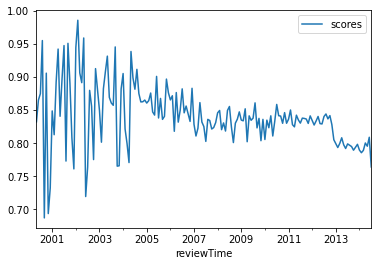

In [117]:
pos_df.plot()

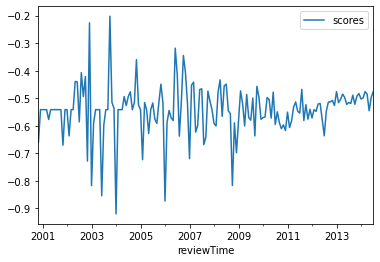

In [118]:
neg_df.plot()

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

decomposition = seasonal_decompose(np.asarray(pos_df), period = 12) 
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

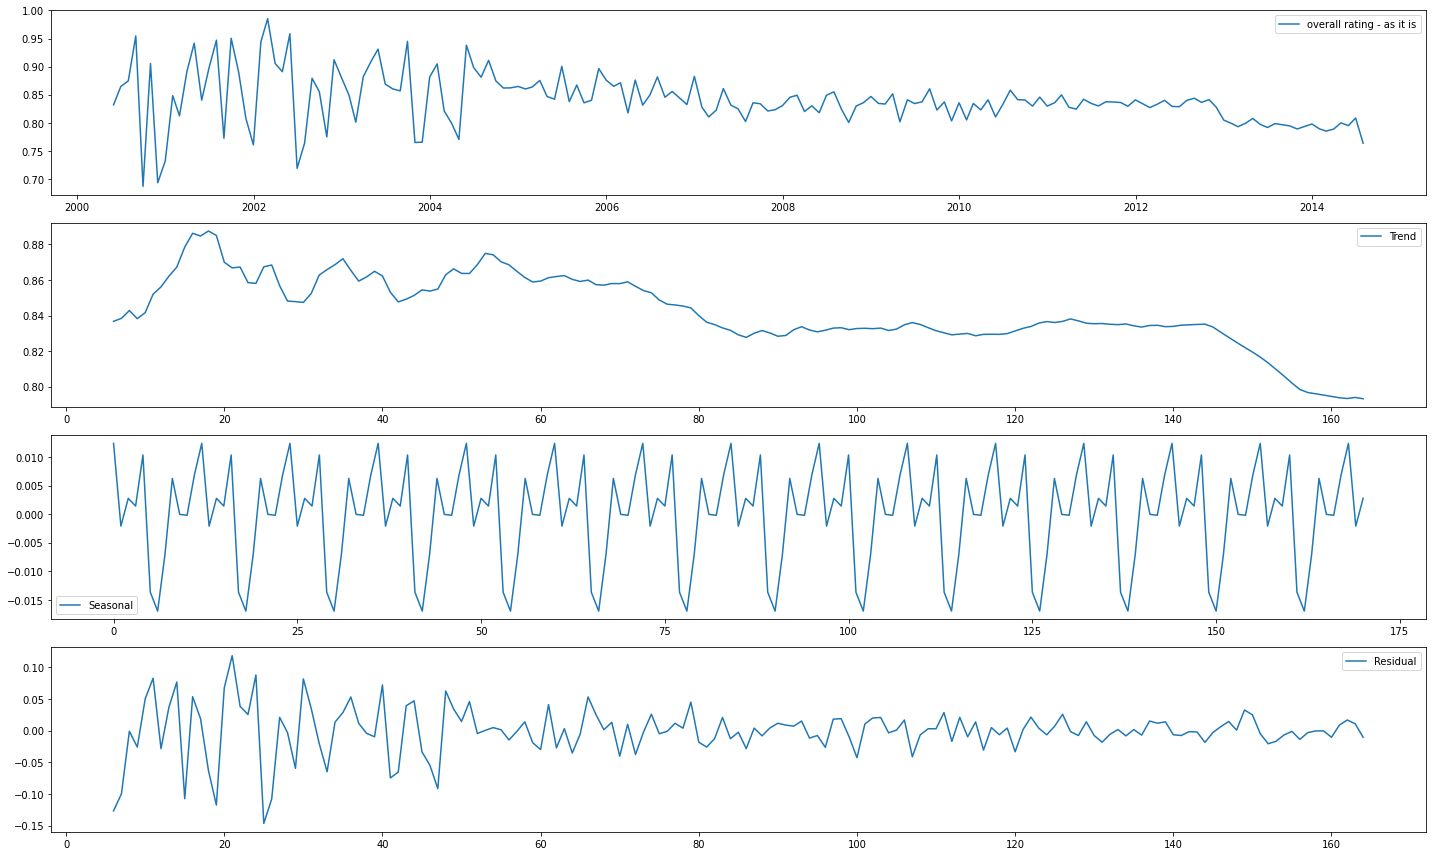

In [120]:
fig,ax = plt.subplots(4,1,figsize = (20,12))


plt.subplot(411)
plt.plot(pos_df, label = 'overall rating - as it is')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')


plt.tight_layout()

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

decomposition = seasonal_decompose(np.asarray(neg_df), period = 12) 
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

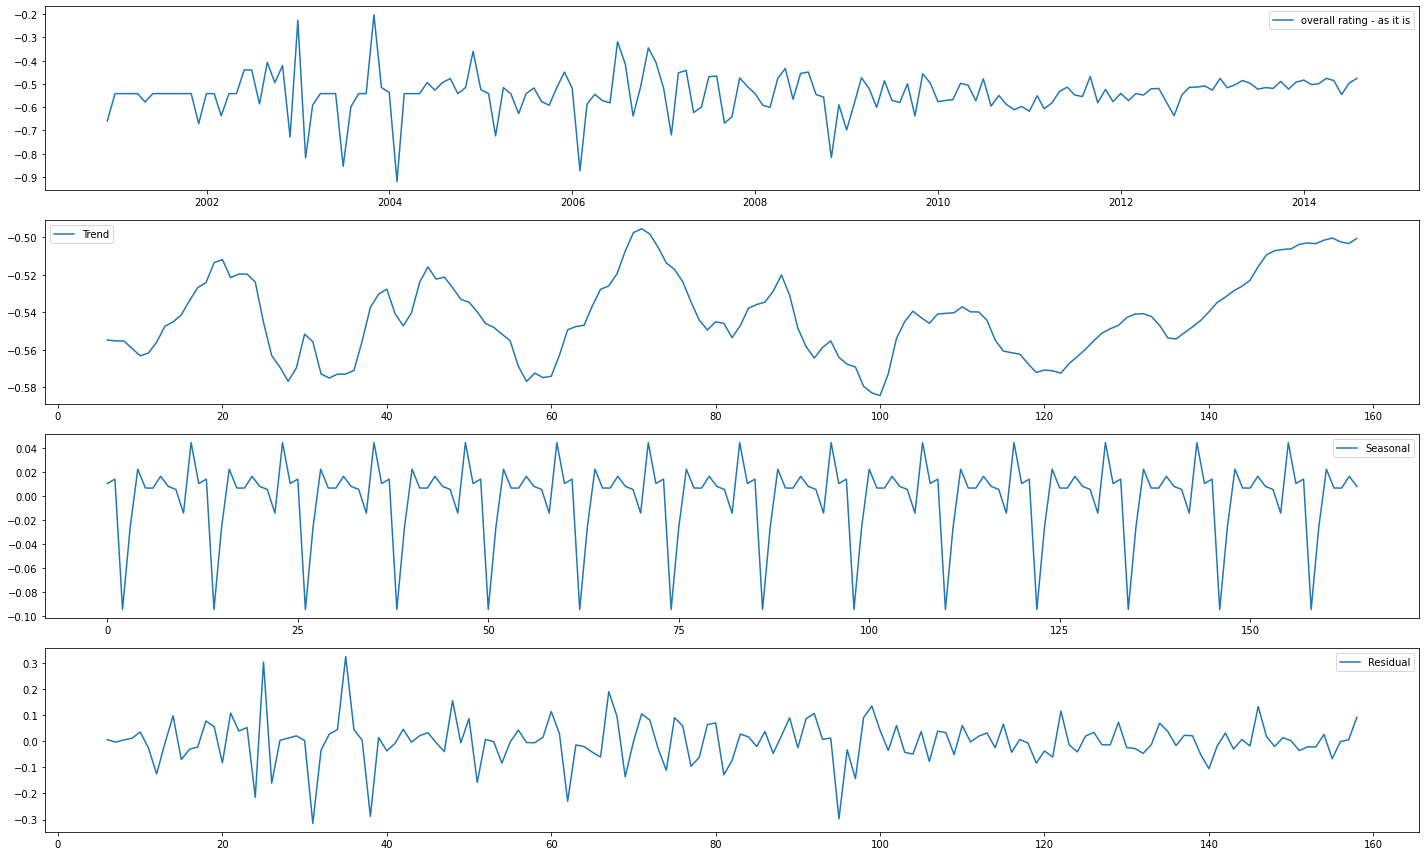

In [122]:
fig,ax = plt.subplots(4,1,figsize = (20,12))


plt.subplot(411)
plt.plot(neg_df, label = 'overall rating - as it is')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')


plt.tight_layout()

In [123]:
len(pos_df)

171

In [124]:
len(neg_df)

165

In [125]:
train_pos = pos_df.iloc[:100]
test_pos = pos_df.iloc[100:]
print("train = {}, test = {}".format(len(train_pos), len(test_pos)))

train = 100, test = 71


In [126]:
train_neg = neg_df.iloc[:90]
test_neg = neg_df.iloc[90:]
print("train = {}, test = {}".format(len(train_neg), len(test_neg)))

train = 90, test = 75


In [92]:
from statsmodels.tsa.stattools import adfuller

# ADF test to determine data stationarity
def checkStationarity(df):
    pvalue = adfuller(df)[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [127]:
checkStationarity(pos_df)

0.8673040469391234


'pvalue=0.8673040469391234. Data is not Stationary. Make the data stationary before model building'

In [128]:
pos_diff = pos_df.rolling(window=1).mean()
pos_diff

pos_diff_dfa = pos_diff - pos_diff.shift(2)
print(pos_diff_dfa)

              scores
reviewTime          
2000-05-31       NaN
2000-06-30       NaN
2000-07-31  0.042614
2000-08-31  0.089967
2000-09-30 -0.187900
...              ...
2014-03-31 -0.000432
2014-04-30  0.014681
2014-05-31  0.006269
2014-06-30  0.008677
2014-07-31 -0.031366

[171 rows x 1 columns]


In [129]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(pos_diff_dfa))
pos_diff_dfa.dropna(inplace = True)
print('After removing Nulls, total records = ', len(pos_diff_dfa))
print(pos_diff_dfa)

Before removing Nulls,total records =  171
After removing Nulls, total records =  169
              scores
reviewTime          
2000-07-31  0.042614
2000-08-31  0.089967
2000-09-30 -0.187900
2000-10-31 -0.049250
2000-11-30  0.006550
...              ...
2014-03-31 -0.000432
2014-04-30  0.014681
2014-05-31  0.006269
2014-06-30  0.008677
2014-07-31 -0.031366

[169 rows x 1 columns]


In [130]:
checkStationarity(pos_diff_dfa)

1.5531446088720223e-10


'pvalue=1.5531446088720223e-10. Data is Stationary. Proceed to model building'

In [131]:
checkStationarity(neg_df)

5.201871991866971e-05


'pvalue=5.201871991866971e-05. Data is Stationary. Proceed to model building'

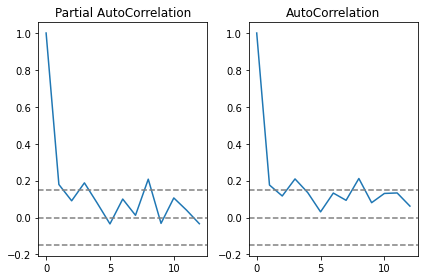

In [132]:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(pos_df, nlags=12)
lag_pacf = pacf(pos_df, nlags=12, method='ols')

# plot PACF (q)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(pos_df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(pos_df)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (p)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(pos_df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(pos_df)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

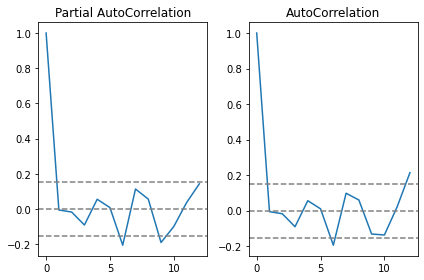

In [133]:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(neg_df, nlags=12)
lag_pacf = pacf(neg_df, nlags=12, method='ols')

# plot PACF (q)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(neg_df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(neg_df)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (p)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(neg_df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(neg_df)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

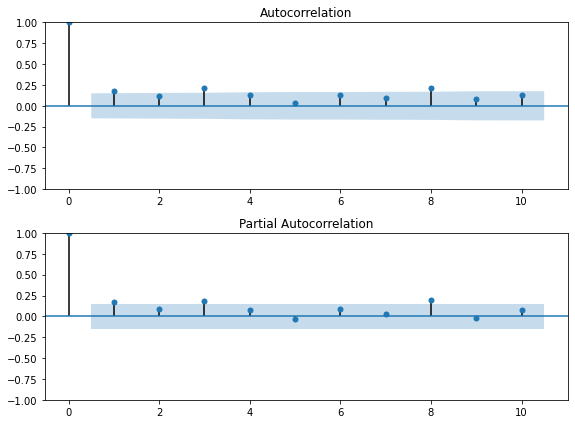

In [134]:
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(pos_df, lags=10, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(pos_df, lags=10, ax=ax2)

plt.tight_layout()



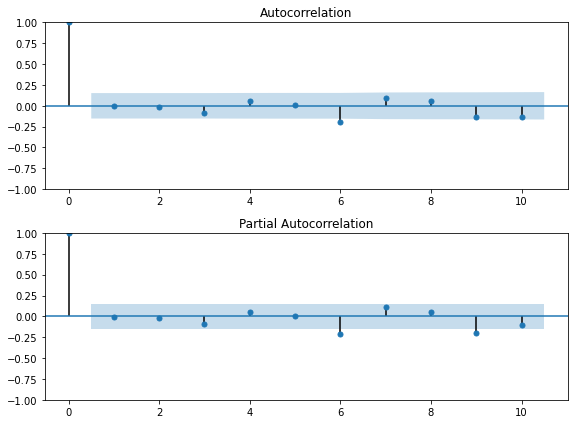

In [135]:
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(neg_df, lags=10, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(neg_df, lags=10, ax=ax2)

plt.tight_layout()



In [136]:
from statsmodels.tsa.arima.model import ARIMA

In [137]:
#!pip install pmdarima

In [138]:
from pmdarima.arima import auto_arima

In [139]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(pos_diff_dfa,start_p=0,max_p=3, start_q=0,max_q=3,  trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-456.974, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-455.060, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-456.903, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-458.950, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.699 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:                        SARIMAX   Log Likelihood                 230.475
Date:                Thu, 05 Jan 2023   AIC                           -458.950
Time:                        03:21:22   BIC                           -455.820
Sample:                    07-31-2000   HQIC                          -457.680
                         - 07-31-2014                                         
Co

In [140]:
# start with initial values for p and q based on auto_arima recommendation
p=1; d=0; q=1
model_arima = ARIMA(pos_df,order=(p,d,q)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 scores   No. Observations:                  171
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 290.794
Date:                Thu, 05 Jan 2023   AIC                           -573.587
Time:                        03:21:26   BIC                           -561.021
Sample:                    05-31-2000   HQIC                          -568.488
                         - 07-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8338      0.018     45.479      0.000       0.798       0.870
ar.L1          0.9843      0.032     30.804      0.000       0.922       1.047
ma.L1         -0.9130      0.057    -16.061      0.0

In [141]:
predictions_arima = model_arima.predict()
print(predictions_arima)

reviewTime
2000-05-31    0.833820
2000-06-30    0.833435
2000-07-31    0.838649
2000-08-31    0.843759
2000-09-30    0.857857
                ...   
2014-03-31    0.809844
2014-04-30    0.808711
2014-05-31    0.808470
2014-06-30    0.807903
2014-07-31    0.808351
Freq: M, Name: predicted_mean, Length: 171, dtype: float64


In [142]:
actual = []
pred = []

for i in range(len(predictions_arima)):
  actual.append(pos_df["scores"][i])
  pred.append(predictions_arima[i])

df_res1 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

       actual  predicted       err
0    0.831886   0.833820 -0.001935
1    0.864633   0.833435  0.031199
2    0.874500   0.838649  0.035851
3    0.954600   0.843759  0.110841
4    0.686600   0.857857 -0.171257
..        ...        ...       ...
166  0.788675   0.809844 -0.021169
167  0.799807   0.808711 -0.008904
168  0.794944   0.808470 -0.013526
169  0.808483   0.807903  0.000580
170  0.763578   0.808351 -0.044773

[171 rows x 3 columns]


In [143]:
from sklearn.metrics import mean_squared_error

msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res1.actual, df_res1.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse2,np.sqrt(mse2)))

ARIMA Model. Order=(1,0,1)
	MSE = 0.0019684395532440753
	RMSE = 0.044367099896703587


Text(0.5, 1.0, 'actual vs predicted data for ARIMA model')

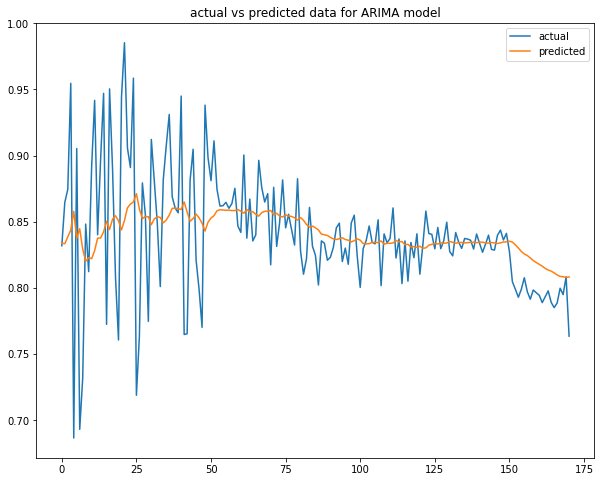

In [144]:
df_res1.actual.plot(figsize=(10,8),legend=True)
df_res1.predicted.plot(legend=True)
plt.title("actual vs predicted data for ARIMA model")  

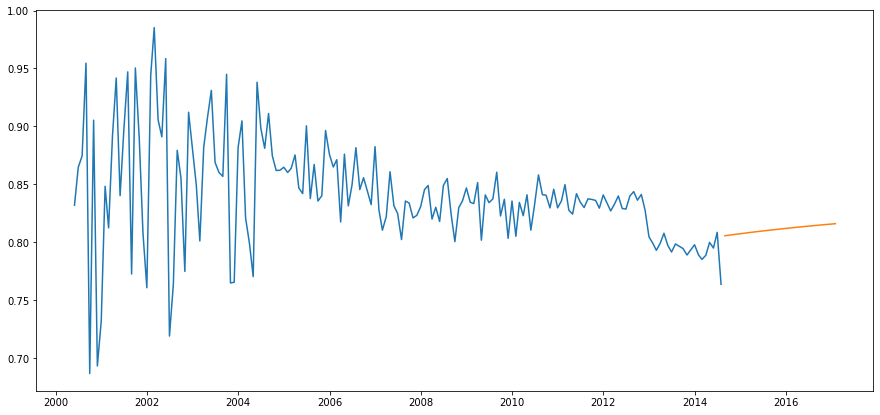

In [145]:
plt.figure(figsize = (15,7))
plt.plot(pos_df)
plt.plot(model_arima.forecast(30))

In [146]:
pvalue = sm.stats.acorr_ljungbox(model_arima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [147]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(neg_df,start_p=0,max_p=2, start_q=0,max_q=2, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.503, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-199.123, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=116.789, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-241.089, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-311.117, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-313.066, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-315.060, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-313.066, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-311.064, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.149 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  165
Model:  

In [148]:
# start with initial values for p and q based on auto_arima recommendation
p=1; d=0; q=1
model_arima_neg = ARIMA(neg_df,order=(p,d,q)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 scores   No. Observations:                  171
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 290.794
Date:                Thu, 05 Jan 2023   AIC                           -573.587
Time:                        03:21:44   BIC                           -561.021
Sample:                    05-31-2000   HQIC                          -568.488
                         - 07-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8338      0.018     45.479      0.000       0.798       0.870
ar.L1          0.9843      0.032     30.804      0.000       0.922       1.047
ma.L1         -0.9130      0.057    -16.061      0.0

In [149]:
predictions_arima_neg = model_arima_neg.predict()
print(predictions_arima_neg)

reviewTime
2000-11-30   -0.541473
2000-12-31   -0.540744
2001-01-31   -0.541471
2001-02-28   -0.541473
2001-03-31   -0.541473
                ...   
2014-03-31   -0.541735
2014-04-30   -0.541881
2014-05-31   -0.541823
2014-06-30   -0.541450
2014-07-31   -0.541751
Freq: M, Name: predicted_mean, Length: 165, dtype: float64


In [150]:
actual = []
pred = []

for i in range(len(predictions_arima_neg)):
  actual.append(neg_df["scores"][i])
  pred.append(predictions_arima_neg[i])

df_res1 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

       actual  predicted           err
0   -0.659000  -0.541473 -1.175268e-01
1   -0.541471  -0.540744 -7.269280e-04
2   -0.541471  -0.541471  2.893014e-07
3   -0.541471  -0.541473  2.554412e-06
4   -0.541471  -0.541473  2.561467e-06
..        ...        ...           ...
160 -0.475840  -0.541735  6.589476e-02
161 -0.485372  -0.541881  5.650926e-02
162 -0.545413  -0.541823 -3.590464e-03
163 -0.496664  -0.541450  4.478626e-02
164 -0.475750  -0.541751  6.600124e-02

[165 rows x 3 columns]


In [151]:
from sklearn.metrics import mean_squared_error

msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res1.actual, df_res1.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse2,np.sqrt(mse2)))

ARIMA Model. Order=(1,0,1)
	MSE = 0.008466745575135564
	RMSE = 0.09201492039411632


Text(0.5, 1.0, 'actual vs predicted data for ARIMA model')

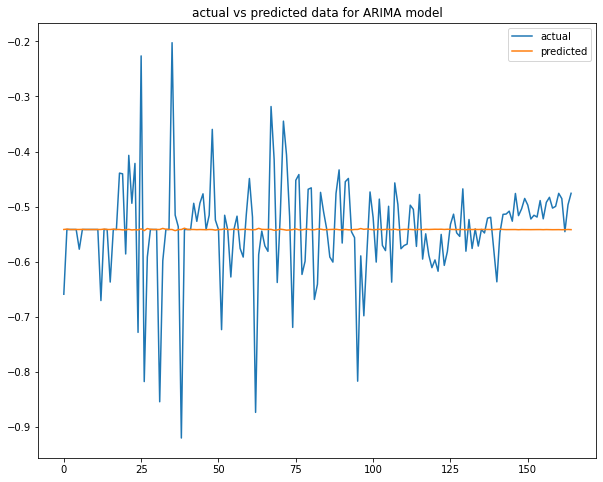

In [152]:
df_res1.actual.plot(figsize=(10,8),legend=True)
df_res1.predicted.plot(legend=True)
plt.title("actual vs predicted data for ARIMA model")  

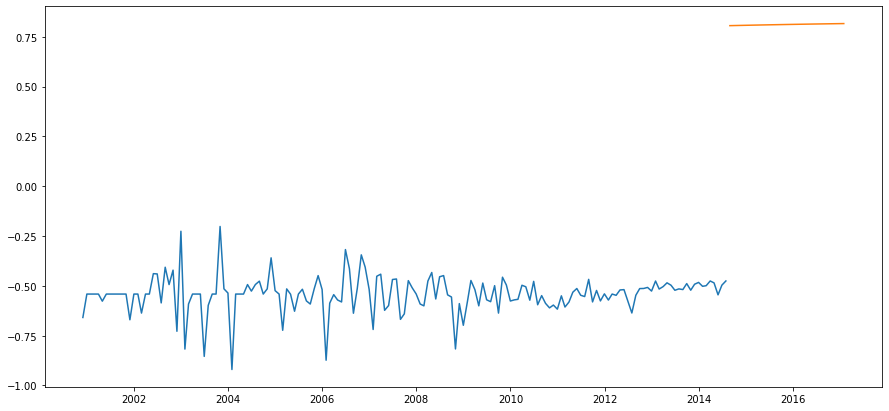

In [153]:
plt.figure(figsize = (15,7))
plt.plot(neg_df)
plt.plot(model_arima.forecast(30))

In [154]:
model_sarima = sm.tsa.statespace.SARIMAX(neg_df,order=(p,d,q),seasonal_order=(1,1,0,12)).fit()

In [155]:
predictions_sarima = model_sarima.predict()
print(predictions_sarima)

reviewTime
2000-11-30    0.000000e+00
2000-12-31    6.198396e-10
2001-01-31    1.904373e-10
2001-02-28    4.105641e-10
2001-03-31    2.993439e-10
                  ...     
2014-03-31   -5.257623e-01
2014-04-30   -5.040119e-01
2014-05-31   -5.072944e-01
2014-06-30   -5.453629e-01
2014-07-31   -5.757312e-01
Freq: M, Name: predicted_mean, Length: 165, dtype: float64


In [156]:
actual2 = []
pred2 = []

for i in range(len(predictions_sarima)):
  actual2.append(neg_df["scores"][i])
  pred2.append(predictions_sarima[i])

df_res2 = pd.DataFrame({'actual':actual2, 'predicted':pred2})
df_res2['err'] = df_res2.actual - df_res2.predicted
print(df_res2)

       actual     predicted       err
0   -0.659000  0.000000e+00 -0.659000
1   -0.541471  6.198396e-10 -0.541471
2   -0.541471  1.904373e-10 -0.541471
3   -0.541471  4.105641e-10 -0.541471
4   -0.541471  2.993439e-10 -0.541471
..        ...           ...       ...
160 -0.475840 -5.257623e-01  0.049922
161 -0.485372 -5.040119e-01  0.018640
162 -0.545413 -5.072944e-01 -0.038119
163 -0.496664 -5.453629e-01  0.048699
164 -0.475750 -5.757312e-01  0.099981

[165 rows x 3 columns]


In [157]:
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ',' + '12'')'
mse3 = mean_squared_error(df_res2.actual, df_res2.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse3,np.sqrt(mse3)))

SARIMA Model. Order=(1,0,1,12)
	MSE = 0.03248837045497628
	RMSE = 0.18024530633272057


In [158]:
rmse=mean_squared_error(actual2,pred2,squared=False)
rmse

0.18024530633272057

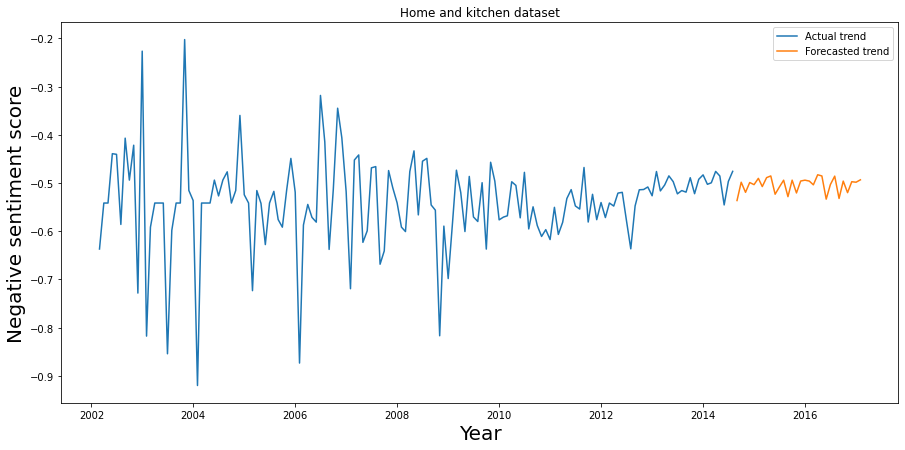

In [159]:
plt.figure(figsize = (15,7))
plt.plot(neg_df[15:])
plt.plot(model_sarima.forecast(30))
plt.legend(['Actual trend','Forecasted trend'])
plt.title("Home and kitchen dataset")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Negative sentiment score",fontsize=20)
plt.show()

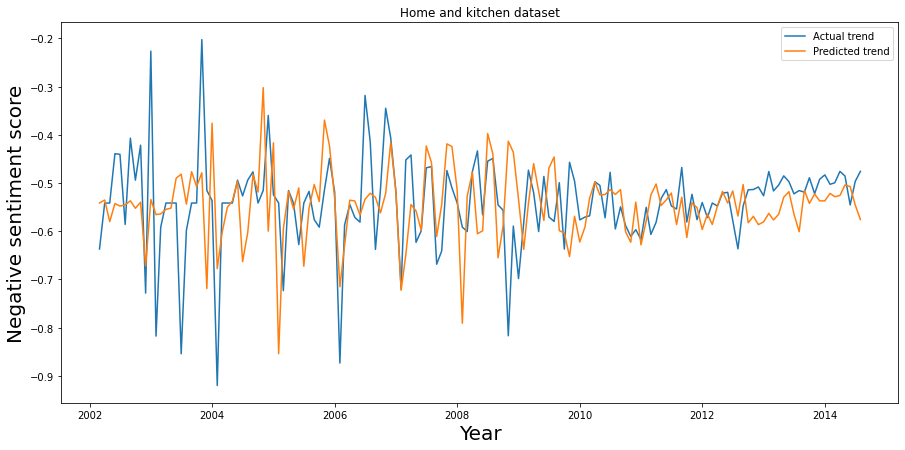

In [160]:
plt.figure(figsize = (15,7))
plt.plot(neg_df[15:])
plt.plot(predictions_sarima[15:])
plt.legend(['Actual trend','Predicted trend'])
plt.title("Home and kitchen dataset")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Negative sentiment score",fontsize=20)
plt.show()

In [161]:
model_sarima = sm.tsa.statespace.SARIMAX(pos_df,order=(p,d,q),seasonal_order=(1,1,0,12)).fit()

In [162]:
predictions_sarima = model_sarima.predict()
print(predictions_sarima)

reviewTime
2000-05-31    0.000000e+00
2000-06-30    1.528025e-10
2000-07-31    1.623935e-10
2000-08-31    1.644303e-10
2000-09-30    1.791909e-10
                  ...     
2014-03-31    8.158270e-01
2014-04-30    8.233685e-01
2014-05-31    8.128544e-01
2014-06-30    8.102014e-01
2014-07-31    8.201683e-01
Freq: M, Name: predicted_mean, Length: 171, dtype: float64


In [163]:
actual2 = []
pred2 = []

for i in range(len(predictions_sarima)):
  actual2.append(pos_df["scores"][i])
  pred2.append(predictions_sarima[i])

df_res2 = pd.DataFrame({'actual':actual2, 'predicted':pred2})
df_res2['err'] = df_res2.actual - df_res2.predicted
print(df_res2)

       actual     predicted       err
0    0.831886  0.000000e+00  0.831886
1    0.864633  1.528025e-10  0.864633
2    0.874500  1.623935e-10  0.874500
3    0.954600  1.644303e-10  0.954600
4    0.686600  1.791909e-10  0.686600
..        ...           ...       ...
166  0.788675  8.158270e-01 -0.027152
167  0.799807  8.233685e-01 -0.023562
168  0.794944  8.128544e-01 -0.017910
169  0.808483  8.102014e-01 -0.001718
170  0.763578  8.201683e-01 -0.056590

[171 rows x 3 columns]


In [164]:
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ',' + '12'')'
mse3 = mean_squared_error(df_res2.actual, df_res2.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse3,np.sqrt(mse3)))

SARIMA Model. Order=(1,0,1,12)
	MSE = 0.05247261650477906
	RMSE = 0.22906902126821746


In [165]:
rmse=mean_squared_error(actual2,pred2,squared=False)
rmse

0.22906902126821746

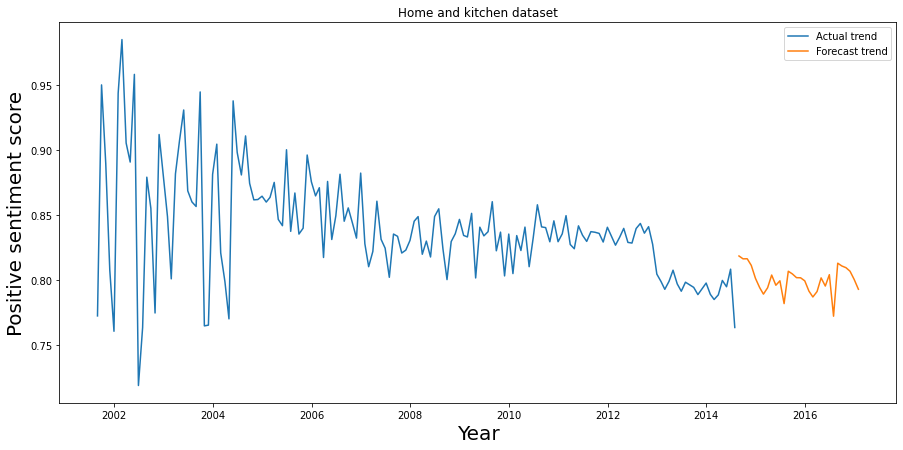

In [166]:
plt.figure(figsize = (15,7))
plt.plot(pos_df[15:])
plt.plot(model_sarima.forecast(30))
plt.legend(['Actual trend','Forecast trend'])
plt.title("Home and kitchen dataset")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Positive sentiment score",fontsize=20)
plt.show()

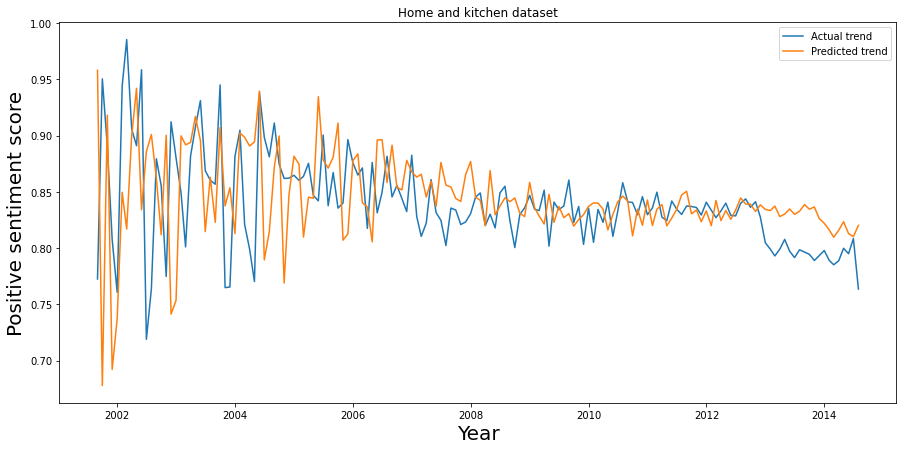

In [167]:
plt.figure(figsize = (15,7))
plt.plot(pos_df[15:])
plt.plot(predictions_sarima[15:])
plt.legend(['Actual trend','Predicted trend'])
plt.title("Home and kitchen dataset")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Positive sentiment score",fontsize=20)
plt.show()

In [168]:
model_sarima.forecast(10)

2014-08-31    0.818651
2014-09-30    0.816446
2014-10-31    0.816510
2014-11-30    0.811417
2014-12-31    0.801423
2015-01-31    0.794318
2015-02-28    0.789271
2015-03-31    0.794160
2015-04-30    0.803972
2015-05-31    0.796105
Freq: M, Name: predicted_mean, dtype: float64

In [169]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,2013-05-06,classy-looking salt pepper shakers look good c...,0.0,"[classy-looking, salt, pepper, shakers, look, ...",0.7906,Excellent
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,2011-07-21,replaced old dgb model failed one pleased much...,50.0,"[replaced, old, dgb, model, failed, one, pleas...",0.9325,Excellent
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,2013-07-17,trashcan worked fine th month started going ha...,0.0,"[trashcan, worked, fine, th, month, started, g...",0.2023,Good
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,2012-12-20,technivorm mocca master needed nd pot decaf pu...,0.0,"[technivorm, mocca, master, needed, nd, pot, d...",0.5034,Good
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,2013-06-15,rack work wooden solid shelves closetmaid type...,0.0,"[rack, work, wooden, solid, shelves, closetmai...",0.1531,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,A23GS4UGLQBG2V,B009REFSJI,C. Boudreau,"[1, 2]",The Bluetooth link to the Wahoo Fitness app is...,2,Cool idea but inaccurate,1391126400,2014-01-31,bluetooth link wahoo fitness app cool worked f...,50.0,"[bluetooth, link, wahoo, fitness, app, cool, w...",0.9531,Excellent
69996,A30P3RMIH0T6XE,B002XH0KLM,lisa827,"[5, 5]",I bring this steamer when I travel to Europe. ...,5,Great for traveling,1368489600,2013-05-14,bring steamer travel europe burn great able st...,100.0,"[bring, steamer, travel, europe, burn, great, ...",0.7351,Excellent
69997,A3OMIAEJ629BSN,B005Q1APZS,No Bone To Pick,"[1, 2]",I sent this item back because it was just too ...,1,Too noisy for my sitting room,1389744000,2014-01-15,sent item back loud review said quiet well qui...,50.0,"[sent, item, back, loud, review, said, quiet, ...",0.2732,Good
69998,A1GS8K0TSHCX84,B001IBG6VW,A. L.,"[0, 0]",This fan moves a decent amount of air without ...,4,A quiet fan with decent air moving ability for...,1386028800,2013-12-03,fan moves decent amount air without loud ideal...,0.0,"[fan, moves, decent, amount, air, without, lou...",0.7762,Excellent


In [ ]:
!pip install xlsxwriter

In [ ]:
data.to_excel(excel_writer="/content/drive/MyDrive/Project/data",engine='xlsxwriter')

In [170]:
data[data['scoreStatus']=='Excellent'].reviewText[1]

'We replaced our old DGB 300 model which failed with this one and am pleased at how much quieter it is and easier to clean.  The carafe is nice but makes it impossible to see how much is left in pot at a glance.  Wish it did not turn off right after brewing and it is necessary to pre-heat the carafe unless you like tepid coffee.  It does stay fairly hot for several hours if pre-heated.  All in all am pleased with product.'

In [171]:
positive.reviewerID.value_counts()

A1IU7S4HCK1XK0    38
A25C2M3QF9G7OQ    37
A17V9XL4CWTQ6G    27
A2ZY49IDE6TY5I    26
A3AZI828WJN1CD    26
                  ..
A36BYA9PJI5ZQM     1
A14T0OO4U0QHDT     1
A2QHHGY71448OJ     1
A2REQUI85URT87     1
AHD3NZHDUZ5I6      1
Name: reviewerID, Length: 38234, dtype: int64

In [172]:
negative.reviewerID.value_counts()

A2NU9H8H5MJZSL    3
A7LLIFTZVW0MD     3
A3F73SC1LY51OO    3
AVNS3H9D0LPGB     3
A1FUXZE0TL8DED    3
                 ..
A3P1SVONO50V1B    1
A14OYFM6KOZ3IP    1
A30J1KT9PVD2L     1
A33SG2UA24DJ9P    1
A2KETRDA2QWM8M    1
Name: reviewerID, Length: 3426, dtype: int64

In [173]:
data[data['Helpful_percentage']>50].reviewerID.value_counts()

A1IU7S4HCK1XK0    39
A25C2M3QF9G7OQ    30
A17V9XL4CWTQ6G    24
A1TPW86OHXTXFC    18
A1W415JP5WEAJK    17
                  ..
A2ECSMTS8OKRKX     1
A2K40JBQHJY1HH     1
A3VRKDZC4Z7ZPD     1
A5J1389VB42RZ      1
AHD3NZHDUZ5I6      1
Name: reviewerID, Length: 19019, dtype: int64

In [174]:
m=pd.read_json("/content/drive/MyDrive/Project/main_data.json",lines=True)

ValueError: ignored

In [ ]:
m

,Unnamed: 0,asin,helpful,reviewText,overall,summary,reviewTime,helpful_percentage,reviewText_toclean,clean_review_text,review_tokens,scores,scoreStatus,Sentiment1,reviewerID
0,0,B005K4Q1YA,"[0, 0]",Don't compare these instant products with the ...,5,DELICIOUS,2014-05-15,0.0,don t compare these instant products with the ...,compare instant products real thing love nice ...,"['compare', 'instant', 'products', 'real', 'th...",0.8720,Excellent,5,AK4S7M8JZZDDV
1,1,B000NMJWZO,"[0, 0]","This mix makes great pancakes, drop biscuits, ...",5,One of the BEST Gluten Free Mixes!,2013-03-02,0.0,this mix makes great pancakes drop biscuits an...,mix makes great pancakes drop biscuits pumpkin...,"['mix', 'makes', 'great', 'pancakes', 'drop', ...",0.7184,Excellent,5,APGI1V8JVIBFS
2,2,B001E5E1XC,"[2, 3]",The taste is pretty good and I'm generally hap...,3,Taste pretty good but it's made in China??,2011-04-07,67.0,the taste is pretty good and i m generally hap...,taste pretty good generally happy purchase tea...,"['taste', 'pretty', 'good', 'generally', 'happ...",0.8979,Excellent,5,A3LX57I5OKG70V
3,3,B0013L0C6W,"[4, 5]",This Sodastream Diet Tonic Syrup is as good as...,4,Good Diet Tonic - Recommended,2012-01-16,80.0,this sodastream diet tonic syrup is as good as...,sodastream diet tonic syrup good store bought ...,"['sodastream', 'diet', 'tonic', 'syrup', 'good...",0.7727,Excellent,5,A3OXHLG6DIBRW8
4,4,B00934S312,"[0, 0]","So, I used this flour (for the first time) for...",5,BEST GF flour I've used yet!,2013-08-17,0.0,so i used this flour for the first time for a ...,used flour first time gf brownie scratch yes r...,"['used', 'flour', 'first', 'time', 'gf', 'brow...",0.9970,Excellent,5,A2E7RX6AFUDQEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,B002YR7A9Q,"[0, 4]",Very Bland really a waste of money there are b...,3,Not the Best...,2012-08-29,0.0,very bland really a waste of money there are b...,bland really waste money better tastier option...,"['bland', 'really', 'waste', 'money', 'better'...",0.0183,Average,3,A3BSTFFIKK5YTW
59996,59996,B0041CH1ZU,"[1, 2]",I love Caesar salads. So when my favorite dres...,3,Tastes like egg salad,2012-04-08,50.0,i love caesar salads so when my favorite dress...,love caesar salads favorite dressing marzetti ...,"['love', 'caesar', 'salads', 'favorite', 'dres...",0.9808,Excellent,5,A1RJUXDK64O91A
59997,59997,B0061IUKDM,"[5, 5]",Wasn't expecting much from this premium green ...,4,Green tea with an unexpectedly delightful tast...,2012-03-21,100.0,wasn t expecting much from this premium green ...,expecting much premium green tea although drin...,"['expecting', 'much', 'premium', 'green', 'tea...",0.9965,Excellent,5,A221I9R7I92ORO
59998,59998,B000DZH19U,"[0, 0]","these cookies are delicious, you really can't ...",5,great cookies,2007-09-28,0.0,these cookies are delicious you really can t g...,cookies delicious really go wrong pamela produ...,"['cookies', 'delicious', 'really', 'go', 'wron...",0.4256,Good,4,A34S4LS6R50VTA


In [ ]:
a=pd.merge(data,m,how='inner',on='reviewerID')

In [ ]:
a.drop_duplicates(subset='unixReviewTime',keep='first',inplace=True)

In [ ]:
a.shape

(2539, 28)

In [ ]:
a.reviewerID.nunique()

1278

In [ ]:
a[a.Helpful_percentage>50].reviewerID.value_counts()

A1IU7S4HCK1XK0    33
A25C2M3QF9G7OQ    26
A17V9XL4CWTQ6G    22
A2NYK9KWFMJV4Y    12
A1ZPY91VE3IDN1    11
                  ..
A276OI0NHBYORX     1
A3CG6YLYZJXQG4     1
A265PCQZA1Y1WF     1
AM2IR1V5EU55U      1
A1RHE0EI5GQM66     1
Name: reviewerID, Length: 950, dtype: int64

In [ ]:
a.reviewerID.value_counts()

A1IU7S4HCK1XK0    33
A25C2M3QF9G7OQ    33
A17V9XL4CWTQ6G    26
A22CW0ZHY3NJH8    19
A2NYK9KWFMJV4Y    17
                  ..
A39LRXD7THXB4B     1
A3P738KVXL2YYM     1
A2YIO225BTKVPU     1
A3TD6SN4DTOGWJ     1
A1RHE0EI5GQM66     1
Name: reviewerID, Length: 1278, dtype: int64

In [ ]:
data[data.reviewerID=='A2NYK9KWFMJV4Y']

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
255,A2NYK9KWFMJV4Y,B007T40P28,"Mike Tarrani ""Jazz Drummer""","[3, 3]",Two common spices I use at my table areSumac 4...,5,Perfect for table spices as well as often used...,1336780800,2012-05-12,two common spices use table aresumac oz zamour...,100.0,"[two, common, spices, use, table, aresumac, oz...",0.9718,Excellent
2492,A2NYK9KWFMJV4Y,B00HDABAQS,"Mike Tarrani ""Jazz Drummer""","[0, 0]",As soon as I received my review sample I thoro...,5,If you only own one set of spatulas let them b...,1395187200,2014-03-19,soon received review sample thoroughly cleaned...,0.0,"[soon, received, review, sample, thoroughly, c...",0.9943,Excellent
4389,A2NYK9KWFMJV4Y,B00KAJ5DSU,"Mike Tarrani ""Jazz Drummer""","[0, 0]",I have a number of aerators and was honestly a...,5,Surprisingly effective,1403049600,2014-06-18,number aerators honestly little skeptical revi...,0.0,"[number, aerators, honestly, little, skeptical...",0.9792,Excellent
6707,A2NYK9KWFMJV4Y,B008FYHGYQ,"Mike Tarrani ""Jazz Drummer""","[3, 3]",To be honest I would never use this as a true ...,5,"Perfect for pasta sauces, stews and soups",1374883200,2013-07-27,honest would never use true dutch oven deter a...,100.0,"[honest, would, never, use, true, dutch, oven,...",0.9970,Excellent
6922,A2NYK9KWFMJV4Y,B00G9YOALG,"Mike Tarrani ""Jazz Drummer""","[0, 0]",When I agreed to review Epare products I told ...,5,From meh to wow in 30 seconds,1395964800,2014-03-28,agreed review epare products told company sele...,0.0,"[agreed, review, epare, products, told, compan...",0.9798,Excellent
20073,A2NYK9KWFMJV4Y,B002IT6VVS,"Mike Tarrani ""Jazz Drummer""","[4, 4]",I love everything about these glasses: Their ...,5,Works of art,1362096000,2013-03-01,love everything glasses design classic europea...,100.0,"[love, everything, glasses, design, classic, e...",0.9834,Excellent
22513,A2NYK9KWFMJV4Y,B00ENEFS1K,"Mike Tarrani ""Jazz Drummer""","[1, 1]",I received a review sample of this scale and h...,5,Easy to keep sanitary and super accurate,1386892800,2013-12-13,received review sample scale step back admire ...,100.0,"[received, review, sample, scale, step, back, ...",0.9785,Excellent
25436,A2NYK9KWFMJV4Y,B000PR19G2,"Mike Tarrani ""Jazz Drummer""","[0, 0]",I cannot believe that I am only now discoverin...,5,A godsend for busy cooks,1371427200,2013-06-17,cannot believe discovering stand hope whoever ...,0.0,"[can, not, believe, discovering, stand, hope, ...",0.9825,Excellent
32142,A2NYK9KWFMJV4Y,B003MU9F6K,"Mike Tarrani ""Jazz Drummer""","[4, 5]",This knife allows you to thinly slice delicate...,5,Affordable semi-pro grade knife,1373328000,2013-07-09,knife allows thinly slice delicate fruits vege...,80.0,"[knife, allows, thinly, slice, delicate, fruit...",0.8344,Excellent
32824,A2NYK9KWFMJV4Y,B00FGE2T72,"Mike Tarrani ""Jazz Drummer""","[2, 2]",I've had a review sample of this mill for less...,5,Perfect for sugar and more,1395964800,2014-03-28,review sample mill less day already tested wit...,100.0,"[review, sample, mill, less, day, already, tes...",0.9912,Excellent


In [ ]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

meta = getDF('/content/drive/MyDrive/Project/meta_Home_and_Kitchen.json.gz')

In [ ]:
meta

,asin,salesRank,imUrl,categories,title,description,related,price,brand
0,0076144011,{'Books': 6285595},http://g-ecx.images-amazon.com/images/G/01/x-s...,[[Home & Kitchen]],"Ninjas, Piranhas, and Galileo",NaN,NaN,NaN,NaN
1,0130350591,{'Kitchen & Dining': 459680},http://ecx.images-amazon.com/images/I/21zcx6RC...,"[[Home & Kitchen, Kitchen & Dining, Dining & E...",Le Creuset Kiwi (Green) Butter Dish Stoneware,Each piece of Le Creuset dinnerware is crafted...,NaN,NaN,NaN
2,0307394530,"{'Arts, Crafts & Sewing': 3597}",http://ecx.images-amazon.com/images/I/51A4FWuj...,"[[Home & Kitchen, Artwork, Posters & Prints]]",Martha Stewart's Wedding Cakes,Of all the decisions that go into planning a w...,"{'also_bought': ['144630163X', '1402717733', '...",14.99,Random House
3,0439903491,{'Software': 7065},http://ecx.images-amazon.com/images/I/61tVxcko...,"[[Home & Kitchen, Artwork, Posters & Prints]]",NaN,Shiver me timbers! Solve I SPY pirate picture ...,"{'also_viewed': ['B000YFSZU8', 'B0016KWZB0', '...",29.99,NaN
4,0578060604,NaN,http://ecx.images-amazon.com/images/I/41aCELWJ...,"[[Home & Kitchen, Furniture, Kitchen & Dining ...",Build A Maloof Inspired Low Back Dining Chair ...,The Maloofinspired Low Back Dining Chair is no...,{'also_viewed': ['B004IO6RS8']},NaN,NaN
...,...,...,...,...,...,...,...,...,...
436983,B00LVJQDBY,NaN,http://ecx.images-amazon.com/images/I/51x%2Btj...,"[[Home & Kitchen, Furniture, Living Room Furni...","Big Boy Recliner Chair, Brown, Hold up to 250 ...",The Northwest Territory Big Boy Recliner Chair...,{'also_viewed': ['B006UMM1Y0']},22.49,NaN
436984,B00LXFN8MS,{'Home &amp; Kitchen': 515079},http://ecx.images-amazon.com/images/I/61e35I1u...,"[[Home & Kitchen, Bedding]]",6 pc Kids Bedding Monkey Twin Comforter set wi...,Alyssa HomeTM Kids twin comforter set Monkey T...,NaN,27.96,NaN
436985,B00LUVXMX0,NaN,http://ecx.images-amazon.com/images/I/61FBUFmn...,"[[Home & Kitchen, Bedding, Quilts]]",3 Pc Cotton Filled Blue White Scroll Floral Qu...,Bedspread offers superior softness and warmth ...,"{'also_viewed': ['B00KD1JYD0', 'B007S7AVVQ', '...",38.98,NaN
436986,B00M0U03EQ,NaN,http://ecx.images-amazon.com/images/I/41CDwpGU...,"[[Home & Kitchen, Furniture, Home Office Furni...",Student Dorm Home Office Laptop Computer Moder...,This student desk is perfect for any home offi...,{'also_viewed': ['B00E7HNT3M']},NaN,NaN


In [ ]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
0,AMGZX4I4INSQ1,B003DXDIZA,Ladybug,"[0, 0]",These are classy-looking salt and pepper shake...,5,Shakers,1367798400,"05 6, 2013",classy-looking salt pepper shakers look good c...,0.0,"[classy-looking, salt, pepper, shakers, look, ...",0.7906,Excellent
1,AOTPTN27YUDIU,B001G8Y2WW,"Sewing Nut ""Sewist2""","[1, 2]",We replaced our old DGB 300 model which failed...,4,Good coffee,1311206400,"07 21, 2011",replaced old dgb model failed one pleased much...,50.0,"[replaced, old, dgb, model, failed, one, pleas...",0.9325,Excellent
2,A35SEBEDIT2XRQ,B000EJVYTS,Paige Smith,"[0, 0]",This trashcan worked fine until the 11th month...,1,Transhcan became faulty in the 11th month of w...,1374019200,"07 17, 2013",trashcan worked fine th month started going ha...,0.0,"[trashcan, worked, fine, th, month, started, g...",0.2023,Good
3,A263VWGZ4GICOP,B005YQZNO8,Charles Osborne,"[0, 0]",I own a Technivorm Mocca Master and needed a 2...,5,Very good coffee!!!!!,1355961600,"12 20, 2012",technivorm mocca master needed nd pot decaf pu...,0.0,"[technivorm, mocca, master, needed, nd, pot, d...",0.5034,Good
4,A15D2WIIVF2I0A,B000KKMNGY,"Sledge ""Sledge""","[0, 0]","Rack will work for wooden solid shelves, but n...",3,Rack good for wooden shelves.,1371254400,"06 15, 2013",rack work wooden solid shelves closetmaid type...,0.0,"[rack, work, wooden, solid, shelves, closetmai...",0.1531,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,A23GS4UGLQBG2V,B009REFSJI,C. Boudreau,"[1, 2]",The Bluetooth link to the Wahoo Fitness app is...,2,Cool idea but inaccurate,1391126400,"01 31, 2014",bluetooth link wahoo fitness app cool worked f...,50.0,"[bluetooth, link, wahoo, fitness, app, cool, w...",0.9531,Excellent
69996,A30P3RMIH0T6XE,B002XH0KLM,lisa827,"[5, 5]",I bring this steamer when I travel to Europe. ...,5,Great for traveling,1368489600,"05 14, 2013",bring steamer travel europe burn great able st...,100.0,"[bring, steamer, travel, europe, burn, great, ...",0.7351,Excellent
69997,A3OMIAEJ629BSN,B005Q1APZS,No Bone To Pick,"[1, 2]",I sent this item back because it was just too ...,1,Too noisy for my sitting room,1389744000,"01 15, 2014",sent item back loud review said quiet well qui...,50.0,"[sent, item, back, loud, review, said, quiet, ...",0.2732,Good
69998,A1GS8K0TSHCX84,B001IBG6VW,A. L.,"[0, 0]",This fan moves a decent amount of air without ...,4,A quiet fan with decent air moving ability for...,1386028800,"12 3, 2013",fan moves decent amount air without loud ideal...,0.0,"[fan, moves, decent, amount, air, without, lou...",0.7762,Excellent


In [ ]:
merged=pd.merge(meta,data,on='asin')

In [ ]:
merged

,asin,salesRank,imUrl,categories,title,description,related,price,brand,reviewerID,...,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
0,0615391206,{'Kitchen & Dining': 3900},http://ecx.images-amazon.com/images/I/41EEhiqv...,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Zoku Quick Pops Recipe Book,This book will help you master the art of crea...,"{'also_bought': ['B004G7W8BW', 'B004KS5BQ6', '...",17.29,Zoku,A2MHCTX43MIMDZ,...,This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011",book must get zoku also highly recommend large...,78.0,"[book, must, get, zoku, also, highly, recommen...",0.9312,Excellent
1,0689027818,{'Home &amp; Kitchen': 1017975},http://ecx.images-amazon.com/images/I/51B0H32D...,[[Home & Kitchen]],"Good Night, Sweet Butterflies: A Color Dreamland",KIDS BOOK ON BUTTERFLIES,"{'also_viewed': ['1581170912', '0399226907']}",473.68,NaN,A3R9X003XW0LNR,...,This beautifully illustrated book featuring te...,5,A sweet book for babies and toddlers,1248652800,"07 27, 2009",beautifully illustrated book featuring ten col...,0.0,"[beautifully, illustrated, book, featuring, te...",0.9565,Excellent
2,0912696591,{'Kitchen & Dining': 9690},http://ecx.images-amazon.com/images/I/51SrvkbX...,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,A2B7UV3A4GHASQ,...,I love love love this book!! Not only does it ...,5,Baker's Dream!,1356566400,"12 27, 2012",love love love book give ideas decorate colors...,0.0,"[love, love, love, book, give, ideas, decorate...",0.9477,Excellent
3,0912696591,{'Kitchen & Dining': 9690},http://ecx.images-amazon.com/images/I/51SrvkbX...,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,A28NC9XJ5NS4Z,...,Cake decorating has always been a hoby for me....,4,Nice for Beginners,1358812800,"01 22, 2013",cake decorating always hoby book excellent us ...,0.0,"[cake, decorating, always, hoby, book, excelle...",0.8316,Excellent
4,0912696591,{'Kitchen & Dining': 9690},http://ecx.images-amazon.com/images/I/51SrvkbX...,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,ALYLJAU8IDT58,...,Bought this book when I was hyped up and excit...,5,very entertaining,1339113600,"06 8, 2012",bought book hyped excited baking decorating ca...,0.0,"[bought, book, hyped, excited, baking, decorat...",0.6808,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,B00LB18EKK,{'Kitchen & Dining': 62565},http://ecx.images-amazon.com/images/I/51Vrq2rK...,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Parmesan Cheese Grater Microplane Version with...,Your search for the best-performing cheese gra...,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...",14.95,NaN,A1Q1Z7IR79G52A,...,Great grater for all kinds of cheese! Parmesan...,5,Love this grater and apple slicer! Works so we...,1405296000,"07 14, 2014",great grater kinds cheese parmesan cheddar any...,100.0,"[great, grater, kinds, cheese, parmesan, chedd...",0.9783,Excellent
69996,B00LB18EKK,{'Kitchen & Dining': 62565},http://ecx.images-amazon.com/images/I/51Vrq2rK...,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Parmesan Cheese Grater Microplane Version with...,Your search for the best-performing cheese gra...,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...",14.95,NaN,A1BWZ7BS12D3H,...,This is a wonderful cheese grater. I got it to...,5,Nice cheese grater to have!,1404777600,"07 8, 2014",wonderful cheese grater got today made tacos d...,0.0,"[wonderful, cheese, grater, got, today, made, ...",0.9

In [ ]:
merged[merged['asin']=='B000QFDNP8'].price

24844    22.48
24845    22.48
24846    22.48
24847    22.48
24848    22.48
         ...  
24918    22.48
24919    22.48
24920    22.48
24921    22.48
24922    22.48
Name: price, Length: 79, dtype: float64

In [ ]:
merged[merged['asin']=='B00004SPEU'].price

1914    22.45
1915    22.45
1916    22.45
1917    22.45
1918    22.45
        ...  
1996    22.45
1997    22.45
1998    22.45
1999    22.45
2000    22.45
Name: price, Length: 87, dtype: float64

In [ ]:
merged[merged['asin']=='B00009R66F'].price

6458    154.68
6459    154.68
6460    154.68
6461    154.68
6462    154.68
         ...  
6537    154.68
6538    154.68
6539    154.68
6540    154.68
6541    154.68
Name: price, Length: 84, dtype: float64

In [ ]:
merged[merged['asin']=='B00005B8K5'].price

3274    17.5
3275    17.5
3276    17.5
3277    17.5
3278    17.5
        ... 
3350    17.5
3351    17.5
3352    17.5
3353    17.5
3354    17.5
Name: price, Length: 81, dtype: float64

In [ ]:
merged[merged['asin']=='B00005B8K5'].brand

3274    Pyrex
3275    Pyrex
3276    Pyrex
3277    Pyrex
3278    Pyrex
        ...  
3350    Pyrex
3351    Pyrex
3352    Pyrex
3353    Pyrex
3354    Pyrex
Name: brand, Length: 81, dtype: object

In [ ]:
merged[merged['asin']=='B00009R66F'].brand

6458    Hoover
6459    Hoover
6460    Hoover
6461    Hoover
6462    Hoover
         ...  
6537    Hoover
6538    Hoover
6539    Hoover
6540    Hoover
6541    Hoover
Name: brand, Length: 84, dtype: object

In [ ]:
merged[merged['asin']=='B00004SPEU'].brand

1914    KRUPS
1915    KRUPS
1916    KRUPS
1917    KRUPS
1918    KRUPS
        ...  
1996    KRUPS
1997    KRUPS
1998    KRUPS
1999    KRUPS
2000    KRUPS
Name: brand, Length: 87, dtype: object

In [ ]:
merged[merged['asin']=='B000QFDNP8'].brand

24844    Contigo
24845    Contigo
24846    Contigo
24847    Contigo
24848    Contigo
          ...   
24918    Contigo
24919    Contigo
24920    Contigo
24921    Contigo
24922    Contigo
Name: brand, Length: 79, dtype: object

In [ ]:
merged.price.mean()

44.61430564856489

In [ ]:
nmerged=merged[(merged['scoreStatus']=='Worst')|(merged['scoreStatus']=='Bad')]

In [ ]:
pmerged=merged[(merged['scoreStatus']=='Excellent')|(merged['scoreStatus']=='Good')]

In [ ]:
nmerged.price.mean()

43.06769396551724

In [ ]:
pmerged.price.mean()

45.313011863224006

In [ ]:
nmerged.brand.value_counts()

Cuisinart                    92
OXO                          92
Norpro                       80
Black &amp; Decker           50
KitchenAid                   48
                             ..
Cobra Enterprises             1
Magefesa                      1
Component Design NW, Inc.     1
Fat Daddios                   1
A2Z Ozone                     1
Name: brand, Length: 801, dtype: int64

In [ ]:
merged.brand.value_counts()

OXO                  2371
Cuisinart            1704
Norpro               1336
Hamilton Beach        827
Wilton                796
                     ... 
AC Safe                 1
Koolatron               1
Woolrich                1
Mr Fizz by Leland       1
To-Go Ware              1
Name: brand, Length: 2769, dtype: int64

In [ ]:
pmerged.brand.value_counts()

OXO                           2189
Cuisinart                     1526
Norpro                        1151
Hamilton Beach                 746
Wilton                         713
                              ... 
Cloer                            1
Sekizo                           1
Azar                             1
Perfect Water Technologies       1
Mastrad Paris                    1
Name: brand, Length: 2684, dtype: int64

In [ ]:
merged.head(3)

,asin,salesRank,imUrl,categories,title,description,related,price,brand,reviewerID,...,reviewText,overall,summary,unixReviewTime,reviewTime,reviewText_clean,Helpful_percentage,review_tokens,scores,scoreStatus
0,0615391206,{'Kitchen & Dining': 3900},http://ecx.images-amazon.com/images/I/41EEhiqv...,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Zoku Quick Pops Recipe Book,This book will help you master the art of crea...,"{'also_bought': ['B004G7W8BW', 'B004KS5BQ6', '...",17.29,Zoku,A2MHCTX43MIMDZ,...,This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011",book must get zoku also highly recommend large...,78.0,"[book, must, get, zoku, also, highly, recommen...",0.9312,Excellent
1,0689027818,{'Home &amp; Kitchen': 1017975},http://ecx.images-amazon.com/images/I/51B0H32D...,[[Home & Kitchen]],"Good Night, Sweet Butterflies: A Color Dreamland",KIDS BOOK ON BUTTERFLIES,"{'also_viewed': ['1581170912', '0399226907']}",473.68,NaN,A3R9X003XW0LNR,...,This beautifully illustrated book featuring te...,5,A sweet book for babies and toddlers,1248652800,"07 27, 2009",beautifully illustrated book featuring ten col...,0.0,"[beautifully, illustrated, book, featuring, te...",0.9565,Excellent
2,0912696591,{'Kitchen & Dining': 9690},http://ecx.images-amazon.com/images/I/51SrvkbX...,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,A2B7UV3A4GHASQ,...,I love love love this book!! Not only does it ...,5,Baker's Dream!,1356566400,"12 27, 2012",love love love book give ideas decorate colors...,0.0,"[love, love, love, book, give, ideas, decorate...",0.9477,Excellent


In [ ]:
merged.categories

0        [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
1                                       [[Home & Kitchen]]
2        [[Home & Kitchen, Kitchen & Dining, Bakeware, ...
3        [[Home & Kitchen, Kitchen & Dining, Bakeware, ...
4        [[Home & Kitchen, Kitchen & Dining, Bakeware, ...
                               ...                        
69995    [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
69996    [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
69997    [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
69998    [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
69999    [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...
Name: categories, Length: 70000, dtype: object

In [ ]:
a=merged[['asin','related','categories','scoreStatus']]

In [ ]:
a

,asin,related,categories,scoreStatus
0,0615391206,"{'also_bought': ['B004G7W8BW', 'B004KS5BQ6', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent
1,0689027818,"{'also_viewed': ['1581170912', '0399226907']}",[[Home & Kitchen]],Excellent
2,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent
3,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent
4,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent
...,...,...,...,...
69995,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent
69996,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent
69997,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent
69998,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent


In [ ]:
b=pd.json_normalize(a['related'])

In [ ]:
b

,also_bought,also_viewed,bought_together,buy_after_viewing
0,"[B004G7W8BW, B004KS5BQ6, B003U9ZCRO, B003VJWUE...","[B003U9ZCRO, B003VJWUE6, B004KS5BQ6, B004G7W8B...","[B004G7W8BW, B003U9ZCRO]",NaN
1,NaN,"[1581170912, 0399226907]",NaN,NaN
2,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
3,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
4,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
...,...,...,...,...
69995,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69996,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69997,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69998,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN


In [ ]:
m=pd.concat([a,b],axis=1)

In [ ]:
m

,asin,related,categories,scoreStatus,also_bought,also_viewed,bought_together,buy_after_viewing
0,0615391206,"{'also_bought': ['B004G7W8BW', 'B004KS5BQ6', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B004G7W8BW, B004KS5BQ6, B003U9ZCRO, B003VJWUE...","[B003U9ZCRO, B003VJWUE6, B004KS5BQ6, B004G7W8B...","[B004G7W8BW, B003U9ZCRO]",NaN
1,0689027818,"{'also_viewed': ['1581170912', '0399226907']}",[[Home & Kitchen]],Excellent,NaN,"[1581170912, 0399226907]",NaN,NaN
2,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
3,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
4,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...","[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
...,...,...,...,...,...,...,...,...
69995,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69996,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69997,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69998,B00LB18EKK,"{'also_bought': ['B00JJOEV9Y', 'B00M04HZIO', '...","[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN


In [ ]:
m.drop(columns='related',inplace=True)

In [ ]:
m

,asin,categories,scoreStatus,also_bought,also_viewed,bought_together,buy_after_viewing
0,0615391206,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B004G7W8BW, B004KS5BQ6, B003U9ZCRO, B003VJWUE...","[B003U9ZCRO, B003VJWUE6, B004KS5BQ6, B004G7W8B...","[B004G7W8BW, B003U9ZCRO]",NaN
1,0689027818,[[Home & Kitchen]],Excellent,NaN,"[1581170912, 0399226907]",NaN,NaN
2,0912696591,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
3,0912696591,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
4,0912696591,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",Excellent,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...","[B0002ZFXSM, B0002ZFXSW, 1934089133, B000OSFIN...","[B003MC22TU, B006UKNSVC]",NaN
...,...,...,...,...,...,...,...
69995,B00LB18EKK,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69996,B00LB18EKK,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69997,B00LB18EKK,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN
69998,B00LB18EKK,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",Excellent,"[B00JJOEV9Y, B00M04HZIO, B00LGW9YUS, B00L8FQZ3...","[B00JK9IZ2M, B0000CFFRO, B00CLULMNG, B00004OCI...",[B00IKRRV02],NaN


In [ ]:
m.asin.sample(23)

51205    B004F02RMA
56494    B005IZAUQG
59200    B006SDJVCQ
21066    B000IE9UUE
17323    B000E1WA7Q
45119    B003DTLOFU
10359    B0001HLTRU
28227    B000Y0977I
211      B00004OCJG
497      B00004OCNT
6873     B0000AZUW9
22742    B000MGMGJK
8504     B0000DDVVZ
33386    B001ET7B30
25062    B000QOMZT4
6592     B00009WE45
68072    B00EQB3R1I
9992     B00012FFXY
56165    B005GPMQ2O
32856    B001DIZ1NO
23520    B000NHY3YO
22583    B000MD85YI
62990    B008PREZOM
Name: asin, dtype: object

In [ ]:
m.drop_duplicates('asin',inplace=True)

In [ ]:
def r(x):
  new=m[m['asin']==x]
  recc=[]
  recc.append(new.bought_together.values[0])
  recc.append(new.also_bought.values[0])
  recc.append(new.buy_after_viewing.values[0])
  recc.append(new.also_viewed.values[0])
  return(recc)

In [ ]:

p=input('Enter the product ID: ')


Enter the product ID: B001DIZ1NO


In [ ]:
print("The recommended products are: ",r(p))

The recommended products for the product are:  [['B000SSN3L2'], ['B000SSN3L2', 'B00B80TLOM', 'B00HNPNNLS', 'B00AA1H3VI', 'B004NGVIIK', 'B000PSCBZO', 'B000VTSYA8', 'B00B80TJUI', 'B008586UJY', '0778801314', 'B00ICBNTS4', 'B001V9K8A6', 'B000IOFI96', 'B000VDRAVI', 'B00B80TJIU', 'B00B80TJLW', 'B00B80TJX0', 'B002KHN60M', 'B0000BYD0F', 'B0000DDVMH', 'B00B80TJXU', 'B0001UZL8A', 'B00GYB3I94', 'B003JMUROA', 'B001NNJ42I', 'B003IOEWL8', 'B00005TN7H', 'B002KHN602', 'B004ZZLE74', 'B004U8R0NS', 'B002YI20NG', 'B00GY9HO8W', 'B0002BF1WY', 'B00KLR49OU', 'B005SK6Y8O', 'B000BWZ7PA', 'B0000BYCFU', 'B007TIN0H6', 'B00212IHBY', 'B00AA1TGO0', 'B0000BYC4B', 'B007QT4GO4', 'B001D9B3GC', 'B00GJPHLXE', 'B00D1H90G4', 'B000W2GYOC', 'B008586V5C', 'B000YGE0ZG', 'B005DSC1RO', 'B0000CF39X', 'B000V5KVDU', 'B008586UGM', 'B004U8R0QA', 'B000BWY314', 'B000N8MPUW', '1612432891', '1558323759', 'B0001UZL80', 'B000BX4PU2', 'B000UTN7YC', 'B000HJBFGC', 'B000VYBB0I', 'B0027VT92K', 'B00H40COY4', 'B003ENB1KI', 'B000VDYUJI', 'B00004UE88